In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import norm


## Import the data and display the head, shape and description of the data.

In [2]:
df = pd.read_csv(r'C:\Users\pc\Downloads\data.xlsx - Sheet1.csv')
df

Unnamed: 0      ID     Salary           DOJ           DOL  \
0         train  203097   420000.0   6/1/12 0:00       present   
1         train  579905   500000.0   9/1/13 0:00       present   
2         train  810601   325000.0   6/1/14 0:00       present   
3         train  267447  1100000.0   7/1/11 0:00       present   
4         train  343523   200000.0   3/1/14 0:00   3/1/15 0:00   
...         ...     ...        ...           ...           ...   
3993      train   47916   280000.0  10/1/11 0:00  10/1/12 0:00   
3994      train  752781   100000.0   7/1/13 0:00   7/1/13 0:00   
3995      train  355888   320000.0   7/1/13 0:00       present   
3996      train  947111   200000.0   7/1/14 0:00   1/1/15 0:00   
3997      train  324966   400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
0         senior quality engineer         Bangalore      f  2/19/90 0:00   
1               assistant manager            Indore      m  10/4/89 0:00   
2                systems engineer           Chennai      f   8/3/92 0:00   
3        senior software engineer           Gurgaon      m  12/5/89 0:00   
4                             get           Manesar      m  2/27/91 0:00   
...                           ...               ...    ...           ...   
3993            software engineer        New Delhi       m  4/15/87 0:00   
3994             technical writer         Hyderabad      f  8/27/92 0:00   
3995  associate software engineer         Bangalore      m   7/3/91 0:00   
3996           software developer  Asifabadbanglore      f  3/20/92 0:00   
3997      senior systems engineer           Chennai      f  2/26/91 0:00   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
0            84.30  ...              -1              -1              -1   
1            85.40  ...              -1              -1              -1   
2            85.00  ...              -1              -1              -1   
3            85.60  ...              -1              -1              -1   
4            78.00  ...              -1              -1              -1   
...            ...  ...             ...             ...             ...   
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
0             -1         -1             0.9737        0.8128       0.5269   
1             -1         -1            -0.7335        0.3789       1.2396   
2             -1         -1             0.2718        1.7109       0.1637   
3             -1         -1             0.0464        0.3448      -0.3440   
4             -1         -1            -0.8810       -0.2793      -1.0697   
...          ...        ...                ...           ...          ...   
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
0         1.35490                -0.4455  
1        -0.10760                 0.8637  
2        -0.86820                 0.6721  
3        -0.40780                -0.9194  
4         0.09163                -0.1295  
...           ...                    ...  
3993      0.64980                -0.9194  
3994      0.77980                -0.0943  
3995     -1.31840                -0.7615  
3996     -0.36120                -0.0943  


In [3]:
df.head()

Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [4]:
df.shape

(3998, 39)

In [5]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

## DATA MANIPULATION

In [6]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [7]:
df

ID     Salary           DOJ           DOL  \
0     203097   420000.0   6/1/12 0:00       present   
1     579905   500000.0   9/1/13 0:00       present   
2     810601   325000.0   6/1/14 0:00       present   
3     267447  1100000.0   7/1/11 0:00       present   
4     343523   200000.0   3/1/14 0:00   3/1/15 0:00   
...      ...        ...           ...           ...   
3993   47916   280000.0  10/1/11 0:00  10/1/12 0:00   
3994  752781   100000.0   7/1/13 0:00   7/1/13 0:00   
3995  355888   320000.0   7/1/13 0:00       present   
3996  947111   200000.0   7/1/14 0:00   1/1/15 0:00   
3997  324966   400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
0         senior quality engineer         Bangalore      f  2/19/90 0:00   
1               assistant manager            Indore      m  10/4/89 0:00   
2                systems engineer           Chennai      f   8/3/92 0:00   
3        senior software engineer           Gurgaon      m  12/5/89 0:00   
4                             get           Manesar      m  2/27/91 0:00   
...                           ...               ...    ...           ...   
3993            software engineer        New Delhi       m  4/15/87 0:00   
3994             technical writer         Hyderabad      f  8/27/92 0:00   
3995  associate software engineer         Bangalore      m   7/3/91 0:00   
3996           software developer  Asifabadbanglore      f  3/20/92 0:00   
3997      senior systems engineer           Chennai      f  2/26/91 0:00   

      10percentage                         10board  ...  ComputerScience  \
0            84.30  board ofsecondary education,ap  ...               -1   
1            85.40                            cbse  ...               -1   
2            85.00                            cbse  ...               -1   
3            85.60                            cbse  ...               -1   
4            78.00                            cbse  ...               -1   
...            ...                             ...  ...              ...   
3993         52.09                            cbse  ...               -1   
3994         90.00                     state board  ...               -1   
3995         81.86                      bse,odisha  ...               -1   
3996         78.72                     state board  ...              438   
3997         70.60                            cbse  ...               -1   

      MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg conscientiousness  \
0                 -1             -1           -1         -1            0.9737   
1                 -1             -1           -1         -1           -0.7335   
2                 -1             -1           -1         -1            0.2718   
3                 -1             -1           -1         -1            0.0464   
4                 -1             -1           -1         -1           -0.8810   
...              ...            ...          ...        ...               ...   
3993              -1             -1           -1         -1           -0.1082   
3994              -1             -1           -1         -1           -0.3027   
3995              -1             -1           -1         -1           -1.5765   
3996              -1             -1           -1         -1           -0.1590   
3997              -1             -1           -1         -1           -1.1128   

     agreeableness  extraversion  nueroticism  openess_to_experience  
0           0.8128        0.5269      1.35490                -0.4455  
1           0.3789        1.2396     -0.10760                 0.8637  
2           1.7109        0.1637     -0.86820                 0.6721  
3           0.3448       -0.3440     -0.40780                -0.9194  
4          -0.2793       -1.0697      0.09163                -0.1295  
...            ...           ...          ...                    ...  
3993        0.3448        0.2366      0.64980        

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [9]:
df.drop(labels=['CollegeCityID','CollegeCityTier','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','TelecomEngg','CivilEngg','ElectricalEngg','ID'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   float64
 1   DOJ                    3998 non-null   object 
 2   DOL                    3998 non-null   object 
 3   Designation            3998 non-null   object 
 4   JobCity                3998 non-null   object 
 5   Gender                 3998 non-null   object 
 6   DOB                    3998 non-null   object 
 7   10percentage           3998 non-null   float64
 8   10board                3998 non-null   object 
 9   12graduation           3998 non-null   int64  
 10  12percentage           3998 non-null   float64
 11  12board                3998 non-null   object 
 12  CollegeID              3998 non-null   int64  
 13  CollegeTier            3998 non-null   int64  
 14  Degree                 3998 non-null   object 
 15  Spec

In [11]:
df[df.Designation=='get']

Salary           DOJ           DOL Designation    JobCity Gender  \
4      200000.0   3/1/14 0:00   3/1/15 0:00         get    Manesar      m   
332    180000.0   8/1/13 0:00   3/1/14 0:00         get         -1      m   
350    340000.0   7/1/10 0:00   5/1/11 0:00         get  Faridabad      m   
1717   145000.0  10/1/12 0:00   1/1/13 0:00         get  Hyderabad      m   
1897   175000.0   5/1/14 0:00       present         get  Hyderabad      m   
2140   600000.0   6/1/14 0:00       present         get     Indore      m   
2318   220000.0   7/1/14 0:00       present         get    Lucknow      m   
2443   110000.0  10/1/14 0:00   4/1/15 0:00         get  kharagpur      m   
2666   200000.0   3/1/10 0:00   3/1/11 0:00         get  Hyderabad      m   
2757   350000.0   1/1/15 0:00       present         get     Nashik      m   
3045   180000.0   1/1/13 0:00  12/1/13 0:00         get  Sahibabad      m   
3126  1210000.0  10/1/10 0:00   9/1/11 0:00         get     Bhopal      m   
3594   280000.0   4/1/14 0:00       present         get     MEERUT      m   
3980   150000.0   7/1/11 0:00   7/1/12 0:00         get    haryana      m   

                DOB  10percentage      10board  12graduation  ...  \
4      2/27/91 0:00         78.00         cbse          2008  ...   
332     8/2/90 0:00         91.80         cbse          2008  ...   
350    8/13/88 0:00         67.67     up board          2004  ...   
1717   7/29/91 0:00         80.00          ssc          2008  ...   
1897    2/4/91 0:00         87.00  state board          2009  ...   
2140    1/5/92 0:00         91.20         cbse          2010  ...   
2318    2/6/92 0:00         80.20         cbse          2009  ...   
2443   3/18/93 0:00         80.00         icse          2010  ...   
2666   5/15/89 0:00         80.00          ssc          2007  ...   
2757   1/17/94 0:00         90.60         cbse          2011  ...   
3045   6/18/89 0:00         84.80         cbse          2006  ...   
3126  10/27/86 0:00         56.40            0          2006  ...   
3594  10/15/91 0:00         84.16         cbse          2010  ...   
3980    8/5/86 0:00         84.00         cbse          2004  ...   

        CollegeState GraduationYear  English  Logical Quant conscientiousness  \
4      Uttar Pradesh           2012      545      625   465           -0.8810   
332            Delhi           2013      580      640   720           -0.1590   
350        Jharkhand           2010      455      615   725           -1.9629   
1717       Telangana           2012      345      495   575            1.5533   
1897  Andhra Pradesh           2013      350      445   295            1.5644   
2140       Jharkhand           2014      720      655   680           -1.4517   
2318   Uttar Pradesh           2014      500      505   645            1.4208   
2443    Chhattisgarh           2014      735      555   535           -0.4463   
2666       Telangana           2010      385      345   425           -0.4173   
2757          Punjab           2015      640      565   715            0.1282   
3045           Delhi           2012      475      605   605            0.0464   
3126  Madhya Pradesh           2010      305      395   455            0.2009   
3594   Uttar Pradesh           2014      510      475   545           -0.0154   
3980         Haryana           2011      515      575   595           -1.4992   

      agreeableness extraversion  nueroticism  openess_to_experience  
4           -0.2793      -1.0697      0.09163                -0.1295  
332          0.8784       0.3174      0.27270                 0.4805  
350         -1.0593      -0.7794     -0.17270                -0.1295  
1717         1.7488       1.6880     -1.14220                 0.1864  
1897        -1.1196       0.4711      1.16010                 0.4805  
2140         0.0459      -1.6807      0.90660                 0.0973  
2318         1.0449      -0.4511      0.01920                 0.6721  
2443        -0.9531       0.1637 

In [12]:
df.drop(df[df['Designation']=='get'].index,inplace=True,axis=0)

In [13]:
df['DOL'] = df['DOL'].apply(lambda x:str(x).replace('present','31/12/15'))
df['DOJ'] = df['DOJ'].astype('datetime64[ns]')
df['DOB'] = df['DOB'].astype('datetime64[ns]')
df['DOJ']=df.DOJ.dt.year
df['DOL']= df['DOL'].astype('datetime64[ns]')
df['DOL']=df.DOL.dt.year
df['EXPERIENCE'] = df['DOL'] - df['DOJ']
df.drop(labels=['DOL','DOJ'],axis=1,inplace=True)
df['DOB']=df.DOB.dt.year
df['AGE'] = 2015 - df['DOB']
df.drop(labels=['DOB'],axis=1,inplace=True)
df[df['JobCity']== -1]

Empty DataFrame
Columns: [Salary, Designation, JobCity, Gender, 10percentage, 10board, 12graduation, 12percentage, 12board, CollegeID, CollegeTier, Degree, Specialization, collegeGPA, CollegeState, GraduationYear, English, Logical, Quant, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, EXPERIENCE, AGE]
Index: []

[0 rows x 26 columns]

In [14]:
df['JobCity'].replace(to_replace=-1, value='UNKNOWN', inplace=True)

In [15]:
df.JobCity.value_counts()

JobCity
Bangalore           627
-1                  460
Noida               368
Hyderabad           332
Pune                290
                   ... 
indore                1
Salem                 1
coimbatore            1
Gandhinagar           1
Asifabadbanglore      1
Name: count, Length: 334, dtype: int64

In [16]:
df.JobCity.unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Hyderabad',
       'Banglore', 'Noida', 'Kolkata', 'Pune', '-1', 'mohali', 'Jhansi',
       'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', 'Bhopal', 

In [17]:
df['JobCity'] = df['JobCity'].apply(lambda x : x.upper())
df['JobCity'] = df['JobCity'].apply(lambda x : x.lstrip())
df['JobCity'] = df['JobCity'].apply(lambda x : x.rstrip())

In [18]:
df.JobCity.unique()

array(['BANGALORE', 'INDORE', 'CHENNAI', 'GURGAON', 'HYDERABAD',
       'BANGLORE', 'NOIDA', 'KOLKATA', 'PUNE', '-1', 'MOHALI', 'JHANSI',
       'DELHI', 'BHUBANESWAR', 'NAVI MUMBAI', 'MUMBAI', 'NEW DELHI',
       'MANGALORE', 'REWARI', 'GAZIABAAD', 'BHIWADI', 'MYSORE', 'RAJKOT',
       'GREATER NOIDA', 'JAIPUR', 'THANE', 'MAHARAJGANJ',
       'THIRUVANANTHAPURAM', 'PUNCHKULA', 'BHUBANESHWAR', 'COIMBATORE',
       'DHANBAD', 'LUCKNOW', 'TRIVANDRUM', 'GANDHI NAGAR', 'UNA',
       'DAMAN AND DIU', 'GURGOAN', 'VSAKHAPTTNAM', 'NAGPUR', 'BHAGALPUR',
       'NEW DELHI - JAISALMER', 'AHMEDABAD', 'KOCHI/COCHIN', 'BANKURA',
       'BENGALURU', 'KANPUR', 'VIJAYAWADA', 'KOCHI', 'BEAWAR', 'ALWAR',
       'SILIGURI', 'RAIPUR', 'BHOPAL', 'JODHPUR', 'UDAIPUR',
       'MUZAFFARPUR', 'KOLKATA`', 'BULANDSHAHAR', 'HARIDWAR', 'RAIGARH',
       'VISAKHAPATNAM', 'JABALPUR', 'UNNAO', 'FARIDABAD', 'AURANGABAD',
       'BELGAUM', 'DEHRADUN', 'RUDRAPUR', 'JAMSHEDPUR', 'VIZAG', 'NOUDA',
       'DHARAMSHALA', 'BA

In [19]:
df.JobCity.value_counts()

JobCity
BANGALORE           665
-1                  460
NOIDA               389
HYDERABAD           365
PUNE                327
                   ... 
BIKANER               1
INDIA                 1
ASANSOL               1
TIRUNELVELLI          1
ASIFABADBANGLORE      1
Name: count, Length: 229, dtype: int64

In [20]:
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('BANGLORE',"BANGALORE"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('ASIFABADBANGALORE',"BANGALORE"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('BHUBANESHWAR',"BHUBANESWAR"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('GREATER NOIDA',"NOIDA"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('GURGOAN',"GURGAON"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('VSAKHAPTTNAM',"VISAKHAPATNAM"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('NEW DELHI - JAISALMER',"DELHI"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('KOCHI/COCHIN',"KOCHI"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('AMBALA CITY',"AMBALA"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('NEW DEHLI',"DELHI"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('HDERABAD',"HYDERABAD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('METTUR, TAMIL NADU',"METTUR"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('PONDI',"PONDICHERRY"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('RAYAGADA, ODISHA',"ODISHA"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('PUNR',"PUNE"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('KERAL',"KERALA"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('DELHI/NCR',"DELHI"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('MUZZAFARPUR',"MUZAFFARPUR"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('RAS AL KHAIMAH',"ABOARD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('PONDY',"PONDICHERRY"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('GURAGAON',"GURGAON"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('BANAGLORE',"BANGALORE"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('LATUR (MAHARASHTRA )',"LATUR"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('DAMMAM',"ABOARD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN',"RAJASTHAN"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('AM',"ABOARD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('TIRUNELVELLI',"TIRUNELVELI"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('NASIKCITY',"NASIK"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('TECHNOPARK, TRIVANDRUM',"TRIVANDRUM"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('GAJIABAAD',"GHAZIABAD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('AL JUBAIL,SAUDI ARABIA',"ABOARD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('KALMAR, SWEDEN',"ABOARD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('SECUNDERABAD',"HYDERABAD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('A-64,SEC-64,NOIDA',"NOIDA"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('HYDERABAD(BHADURPALLY)',"HYDERABAD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('JEDDAH SAUDI ARABIA',"ABOARD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('CHENNAI, BANGALORE',"BANGALORE"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('GONDA',"GONDAL"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('NAVI MUMBAI , HYDERABAD',"MUMBAI"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('JOHANNESBURG',"ABOARD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('LONDON',"ABOARD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('BADDI HP',"BADDI"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('BULANDSHAHAR',"BULANDSHAHR"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('VIZAG',"VISAKHAPATNAM"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('NOUDA',"NOIDA"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('BANAGALORE',"BANGALORE"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('GURGA',"GURGAON"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('AUSTRALIA',"ABOARD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('SONEPAT',"SONIPAT"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('CHENNAI AND COIMBATORE',"CHENNAI"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('TIRUPATHI',"TIRUPATI"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('BHUBNESHWAR',"BHUBANESWAR"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('CALICUT',"KOLKATA"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('GANDHINAGAR',"GANDHI NAGAR"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('DUBAI',"ABOARD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('NASHIK',"NASIK"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('INDIRAPURAM, GHAZIABAD',"GHAZIABAD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('CHENNAI & MUMBAI',"CHENNAI"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('HOSPETE',"HOSAPETE"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('KUDANKULAM ,TARAPUR',"KUDANKULAM"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('GAZIABAAD',"GHAZIABAD"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('NEW DELHI',"DELHI"))
df['JobCity'] = df['JobCity'].apply(lambda x:x.replace('UNA',"UNNAO"))




In [21]:
df.JobCity.value_counts()

JobCity
BANGALORE                  683
-1                         460
NOIDA                      420
HYDERABAD                  370
PUNE                       328
                          ... 
KUDANKULABOARD ,TARAPUR      1
NCR                          1
GANJABOARD                   1
DHARUHERA                    1
RAJPURA                      1
Name: count, Length: 183, dtype: int64

In [22]:
len(df["JobCity"].unique())

183

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3984 entries, 0 to 3997
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3984 non-null   float64
 1   Designation            3984 non-null   object 
 2   JobCity                3984 non-null   object 
 3   Gender                 3984 non-null   object 
 4   10percentage           3984 non-null   float64
 5   10board                3984 non-null   object 
 6   12graduation           3984 non-null   int64  
 7   12percentage           3984 non-null   float64
 8   12board                3984 non-null   object 
 9   CollegeID              3984 non-null   int64  
 10  CollegeTier            3984 non-null   int64  
 11  Degree                 3984 non-null   object 
 12  Specialization         3984 non-null   object 
 13  collegeGPA             3984 non-null   float64
 14  CollegeState           3984 non-null   object 
 15  Graduatio

In [24]:
df.GraduationYear.value_counts()

GraduationYear
2013    1179
2014    1032
2012     844
2011     506
2010     289
2015      93
2009      24
2017       8
2016       7
0          1
2007       1
Name: count, dtype: int64

In [25]:
df[df['GraduationYear']==0]

Salary       Designation     JobCity Gender  10percentage 10board  \
2664  325000.0  systems engineer  CHANDIGARH      m          89.0    cbse   

      12graduation  12percentage 12board  CollegeID  ...  English Logical  \
2664          2010          85.2    cbse       8346  ...      695     655   

     Quant  conscientiousness agreeableness  extraversion  nueroticism  \
2664   680             1.1336        0.3789       -0.2974      -0.3612   

      openess_to_experience  EXPERIENCE  AGE  
2664                 -1.244           1   24  

[1 rows x 26 columns]

In [26]:
df.drop(df[df['GraduationYear']==0].index,inplace=True,axis=0)

In [27]:
df.GraduationYear.value_counts()

GraduationYear
2013    1179
2014    1032
2012     844
2011     506
2010     289
2015      93
2009      24
2017       8
2016       7
2007       1
Name: count, dtype: int64

In [28]:
df['10percentage'].value_counts()


10percentage
78.00    75
82.00    71
85.00    67
76.00    66
73.00    65
         ..
87.04     1
81.14     1
61.75     1
89.29     1
78.72     1
Name: count, Length: 850, dtype: int64

In [29]:
df['10board'].value_counts()

10board
cbse                          1386
state board                   1163
0                              349
icse                           280
ssc                            120
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: count, Length: 275, dtype: int64

In [30]:
df['10board'].replace(to_replace=0, value='cbse', inplace=True)

In [31]:
df['10board'].value_counts()

10board
cbse                          1386
state board                   1163
0                              349
icse                           280
ssc                            120
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: count, Length: 275, dtype: int64

In [32]:
df['12graduation'].value_counts()

12graduation
2009    1050
2008     932
2010     738
2007     527
2006     405
2005     160
2004      71
2011      45
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: count, dtype: int64

In [33]:
df['12percentage'].value_counts()

12percentage
70.00    72
72.00    67
74.00    63
68.00    58
62.00    58
         ..
65.90     1
76.77     1
68.15     1
65.25     1
82.55     1
Name: count, Length: 800, dtype: int64

In [34]:
df['12board'].value_counts()

12board
cbse                               1391
state board                        1253
0                                   358
icse                                128
up board                             86
                                   ... 
hbsc                                  1
jawahar higher secondary school       1
nagpur board                          1
bsemp                                 1
boardofintermediate                   1
Name: count, Length: 339, dtype: int64

In [35]:
df['12board'].replace(to_replace=0, value='cbse', inplace=True)

In [36]:
df['12board'].value_counts()

12board
cbse                               1391
state board                        1253
0                                   358
icse                                128
up board                             86
                                   ... 
hbsc                                  1
jawahar higher secondary school       1
nagpur board                          1
bsemp                                 1
boardofintermediate                   1
Name: count, Length: 339, dtype: int64

In [37]:
df['CollegeID'].value_counts()

CollegeID
272      94
64       38
44       35
11759    35
47       32
         ..
4566      1
5931      1
1015      1
3739      1
4883      1
Name: count, Length: 1348, dtype: int64

In [38]:
df['CollegeTier'].value_counts()

CollegeTier
2    3688
1     295
Name: count, dtype: int64

In [39]:
df['Degree'].value_counts()

Degree
B.Tech/B.E.      3685
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64

In [40]:
df['Specialization'].value_counts()

Specialization
electronics and communication engineering      879
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
electronics and electrical engineering         193
mechanical engineering                         192
electronics & telecommunications               121
electrical engineering                          81
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical enginee

In [41]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assistant s

In [42]:
df['Designation'] = df['Designation'].apply(lambda x : x.lstrip())
df['Designation'] = df['Designation'].apply(lambda x : x.rstrip())

In [43]:
df['Designation'] = df['Designation'].apply(lambda x:x.replace('software enginner',"software engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('software engg',"software engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('graduate trainee engineer',"graduate engineer trainee"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('software engineere',"software engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('ase',"associate software engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('associate software engg',"associate software engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('assistant system engineer - trainee',"assistant system engineer trainee"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('systems engineer',"system engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('r & d',"r&d engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('.net web developer',".net developer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('graduate trainee engineer',"graduate engineer trainee"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('team leader',"team lead"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('hr executive',"executive hr"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('operational executive',"operation executive"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('executive engg',"executive engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('web designer and joomla administrator',"web designer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('web designer and seo',"web designer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('sr. engineer',"senior engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('hr assistant',"human resource assistant"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('jr. software engineer',"junior software engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('front end web developer',"front end developer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('qa analyst',"quality analyst"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('qa engineer',"quality engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('dotnet developer',".net developer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('rf/dt engineer',"rf engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('software test engineer (etl)',"software test engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('software test engineerte',"software test engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('software devloper',"software developer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('qa analyst',"quality analyst"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('qa engineer',"quality engineer"))
df['Designation'] = df['Designation'].apply(lambda x:x.replace('dotnet developer',".net developer"))


In [44]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'system engineer',
       'senior software engineer', 'java software engineer',
       'mechanical engineer', 'electrical engineer', 'project engineer',
       'senior php developer', 'senior system engineer',
       'quality assurance engineer', 'quality analyst',
       'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst',
       'associate software engineer', 'telecommunication engineer',
       'application developer', 'ios developer', 'executive assistant',
       'online marketing manager', 'documentation specialist',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer',
       'junior software engineer', 'trainee software developer',
       'ui developer', 'assistant system engineer', 'an

In [45]:
df['Designation'].replace(to_replace='software eng', value='software engineer', inplace=True)
df['Designation'].replace(to_replace='seo', value='seo engineer', inplace=True)


In [46]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'system engineer',
       'senior software engineer', 'java software engineer',
       'mechanical engineer', 'electrical engineer', 'project engineer',
       'senior php developer', 'senior system engineer',
       'quality assurance engineer', 'quality analyst',
       'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst',
       'associate software engineer', 'telecommunication engineer',
       'application developer', 'ios developer', 'executive assistant',
       'online marketing manager', 'documentation specialist',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer',
       'junior software engineer', 'trainee software developer',
       'ui developer', 'assistant system engineer', 'an

In [47]:
len(df['Designation'].unique())

388

In [48]:
df['JobCity'].replace(to_replace='GURGAONON', value='GURGAON', inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3983 entries, 0 to 3997
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3983 non-null   float64
 1   Designation            3983 non-null   object 
 2   JobCity                3983 non-null   object 
 3   Gender                 3983 non-null   object 
 4   10percentage           3983 non-null   float64
 5   10board                3983 non-null   object 
 6   12graduation           3983 non-null   int64  
 7   12percentage           3983 non-null   float64
 8   12board                3983 non-null   object 
 9   CollegeID              3983 non-null   int64  
 10  CollegeTier            3983 non-null   int64  
 11  Degree                 3983 non-null   object 
 12  Specialization         3983 non-null   object 
 13  collegeGPA             3983 non-null   float64
 14  CollegeState           3983 non-null   object 
 15  Graduatio

In [50]:
df.drop(df[df['EXPERIENCE']==24].index,inplace=True,axis=0)

In [51]:
df.drop(df[df['EXPERIENCE']==6].index,inplace=True,axis=0)

## DATAFRAME AFTER DATA MANIPULATION AND DATA CLEANING

In [52]:
df.head()

Salary               Designation    JobCity Gender  10percentage  \
0   420000.0   senior quality engineer  BANGALORE      f         84.30   
1   500000.0         assistant manager     INDORE      m         85.40   
2   325000.0           system engineer    CHENNAI      f         85.00   
3  1100000.0  senior software engineer    GURGAON      m         85.60   
5   300000.0           system engineer  HYDERABAD      m         89.92   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
5                     state board          2010          87.0   

                              12board  CollegeID  ...  English Logical Quant  \
0  board of intermediate education,ap       1141  ...      515     585   525   
1                                cbse       5807  ...      695     610   780   
2                                cbse         64  ...      615     545   370   
3                                cbse       6920  ...      635     585   625   
5                         state board       5086  ...      560     555   620   

   conscientiousness agreeableness  extraversion  nueroticism  \
0             0.9737        0.8128        0.5269       1.3549   
1            -0.7335        0.3789        1.2396      -0.1076   
2             0.2718        1.7109        0.1637      -0.8682   
3             0.0464        0.3448       -0.3440      -0.4078   
5            -0.3027       -0.6201       -2.2954      -0.7415   

   openess_to_experience  EXPERIENCE  AGE  
0                -0.4455           3   25  
1                 0.8637           2   26  
2                 0.6721           1   23  
3                -0.9194           4   26  
5                -0.8608           1   23  

[5 rows x 26 columns]

In [53]:
df.describe()

Salary  10percentage  12graduation  12percentage     CollegeID  \
count  3.981000e+03   3981.000000   3981.000000   3981.000000   3981.000000   
mean   3.076637e+05     77.912575   2008.088922     74.452449   5152.011304   
std    2.124744e+05      9.852100      1.650683     11.011394   4800.027817   
min    3.500000e+04     43.000000   1995.000000     40.000000      2.000000   
25%    1.800000e+05     71.670000   2007.000000     66.000000    494.000000   
50%    3.000000e+05     79.000000   2008.000000     74.330000   3879.000000   
75%    3.700000e+05     85.670000   2009.000000     82.600000   8811.000000   
max    4.000000e+06     97.760000   2013.000000     98.700000  18409.000000   

       CollegeTier   collegeGPA  GraduationYear      English      Logical  \
count  3981.000000  3981.000000     3981.000000  3981.000000  3981.000000   
mean      1.925898    71.487993     2012.609646   501.560663   501.395880   
std       0.261970     8.173520        1.314529   104.832267    86.710481   
min       1.000000     6.450000     2007.000000   180.000000   195.000000   
25%       2.000000    66.400000     2012.000000   425.000000   445.000000   
50%       2.000000    71.720000     2013.000000   500.000000   505.000000   
75%       2.000000    76.360000     2014.000000   570.000000   565.000000   
max       2.000000    99.930000     2017.000000   875.000000   795.000000   

             Quant  conscientiousness  agreeableness  extraversion  \
count  3981.000000        3981.000000    3981.000000   3981.000000   
mean    513.057272          -0.036886       0.147785      0.004026   
std     122.220719           1.027947       0.941264      0.951769   
min     120.000000          -4.126700      -5.781600     -4.600900   
25%     430.000000          -0.649100      -0.287100     -0.604800   
50%     515.000000           0.046400       0.212400      0.091400   
75%     595.000000           0.702700       0.812800      0.672000   
max     900.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience   EXPERIENCE          AGE  
count  3981.000000            3981.000000  3981.000000  3981.000000  
mean     -0.170804              -0.137975     1.530018    24.571213  
std       1.007809               1.009117     1.105225     1.765033  
min      -2.643000              -7.375700     0.000000    18.000000  
25%      -0.868200              -0.669200     1.000000    23.000000  
50%      -0.234400              -0.094300     1.000000    24.000000  
75%       0.526200               0.502400     2.000000    26.000000  
max       3.352500               1.822400     9.000000    38.000000

## UNI-VARIATE ANALYSIS

### UNI-VARIATE ANALYSIS ON SALARY

In [54]:
import plotly.express as px
fig = px.box(df['Salary'],orientation='h')
fig.show()

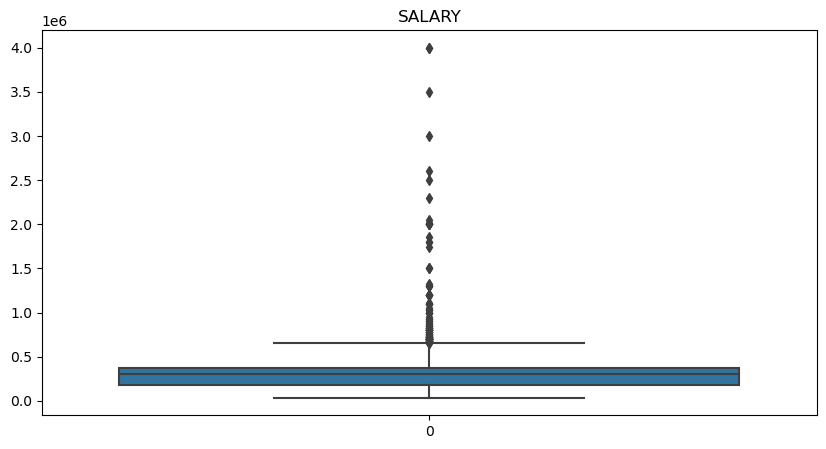

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Salary'])
plt.title('SALARY')
plt.show()

- THE MOST OF THE SALARIES ARE RANGE BETWEEN 180000 TO 370000.
- THE HIGHEST SALARY IS 40 LAKHS.

### UNI-VARIATE ANALYSIS ON 10TH PERCENTAGE

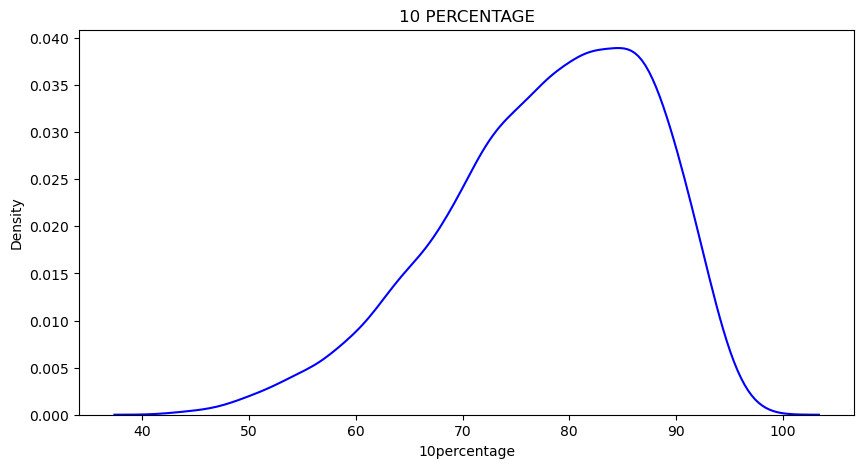

In [56]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['10percentage'],color='blue')
plt.title('10 PERCENTAGE')
plt.show()

- THE MOST OF 10TH PERCENTAGE ARE RANGE BETWEEN 60 TO 95.

### UNI-VARIATE ANALYSIS ON 12TH GRADUATION

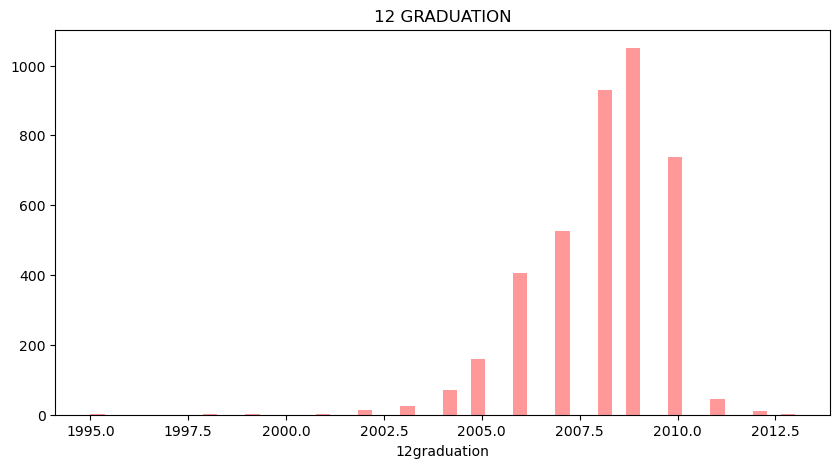

In [57]:
plt.figure(figsize=(10,5))
sns.distplot(df['12graduation'],kde=False,color='r')
plt.title('12 GRADUATION')
plt.show()

- THE MOST OF THE 12TH GRADUATION ARE FROM 2009 and 2008.
- THE LEAST ARE FROM 2001,1995,1998,2013 and 1999.

### UNI-VARIATE ANALYSIS ON 12TH PERCENAGE

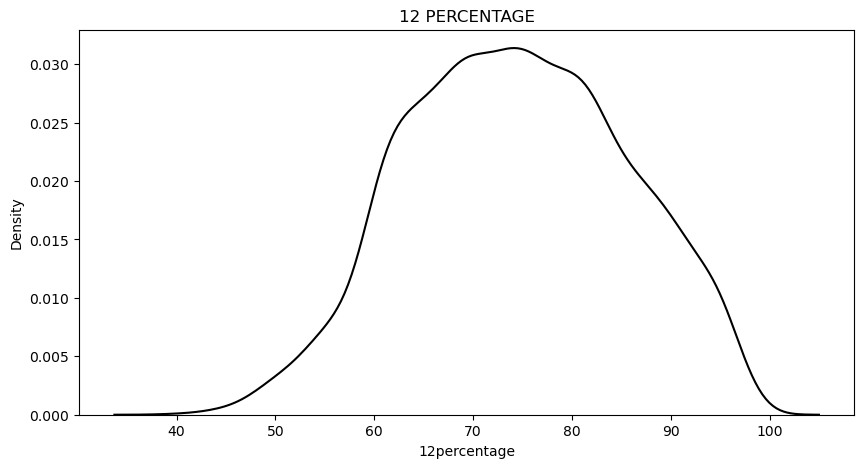

In [58]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['12percentage'],color='black')
plt.title('12 PERCENTAGE')
plt.show()

- THE MOST OF 12TH PERCENTAGE ARE RANGE BETWEEN 50 TO 95.

### UNI-VARIATE ANALYSIS ON DEGREE

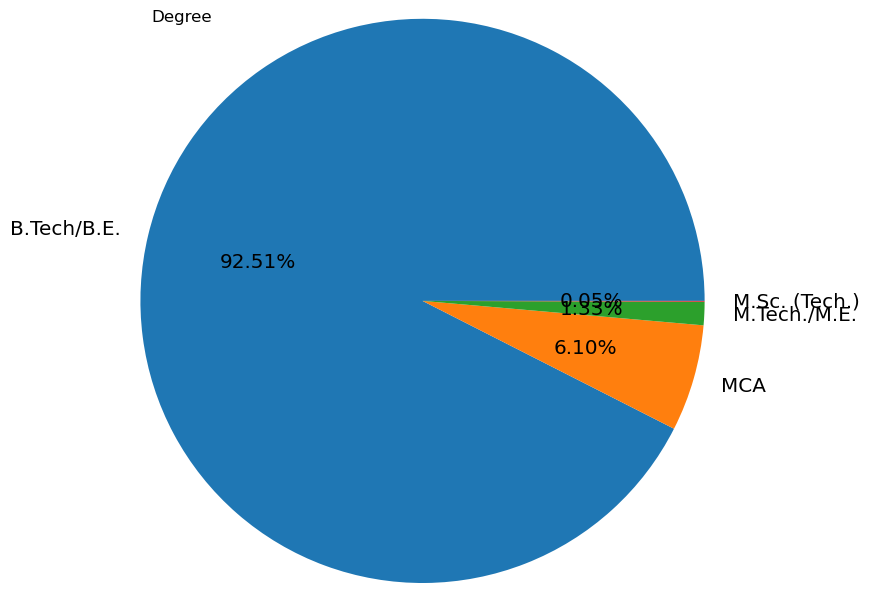

In [59]:
plt.figure(figsize=(7,8))
plt.pie(df['Degree'].value_counts(),labels=df['Degree'].value_counts().index,autopct='%.2f%%',textprops={'size': 'x-large'},radius=1.3)
plt.title('Degree',loc='left')
plt.show()

- B.TECH/B.E STUDENTS ARE GIVING MORE df EXAM.
- THE LEAST STUDENTS FROM M.SC GIVING df EXAM

### UNI-VARIATE ANALYSIS ON COLLEGE GPA

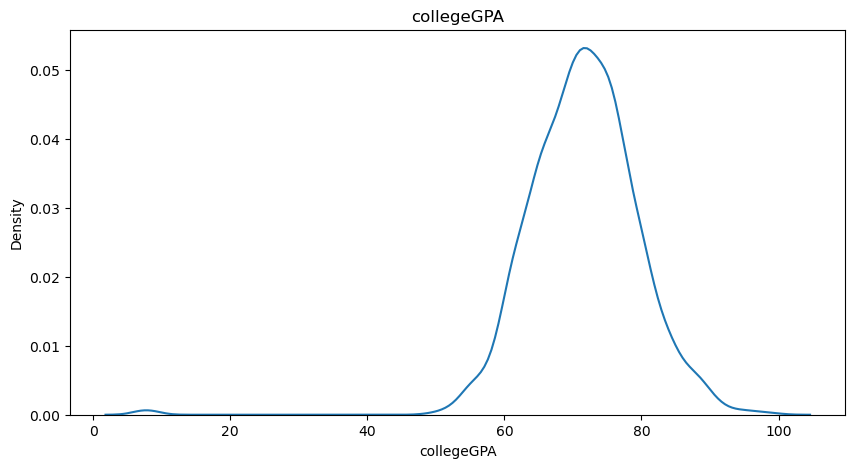

In [60]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['collegeGPA'])
plt.title('collegeGPA')
plt.show()

- THE MOST OF COLLEGE GPA  ARE RANGE BETWEEN 50 TO 80.
- MOST OF THE STUDENTS HAVE MORE COLLEGEGPA.

### UNI-VARIATE ANALYSIS ON GRADUATION YEAR

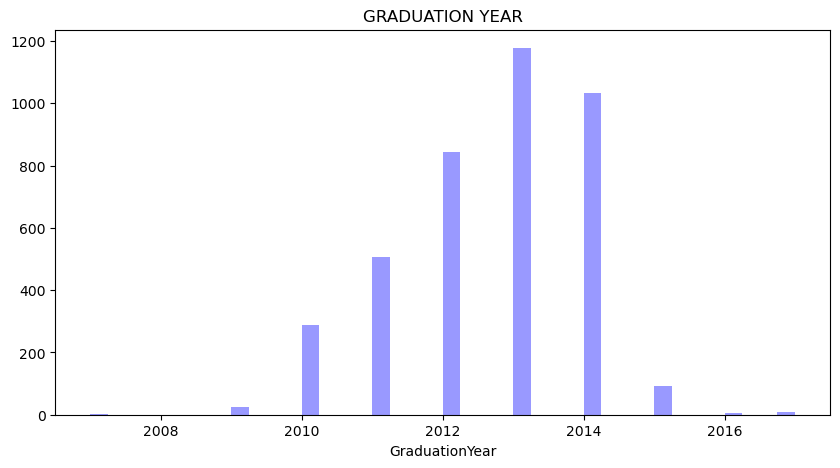

In [61]:
plt.figure(figsize=(10,5))
sns.distplot(df['GraduationYear'],kde=False,color='blue')
plt.title('GRADUATION YEAR')
plt.show()

- THE MOST OF THE GRADUATES ARE FROM 2013 and 2014.
- THE LEAST GRADUATES ARE FROM 2007.

### UNI-VARIATE ANALYSIS ON COLLEGE STATE

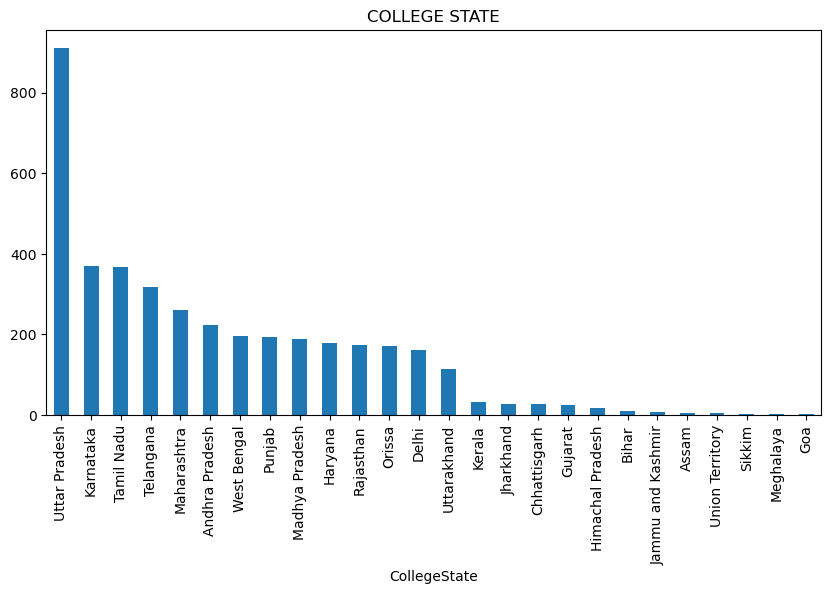

In [62]:
plt.figure(figsize=(10,5))
df['CollegeState'].value_counts().plot.bar()
plt.xticks(rotation=90,fontsize=10)
plt.title('COLLEGE STATE')
plt.show()

- THE MOST OF THE GRADUATES ARE FROM UTTAR PRADESH,KARNATAKA,TAMIL NADU AND TELANGANA.
- THE LEAST OF THE GRADUATES ARE FROM GOA,MEGHALAYA AND SIKKIM.

### UNI-VARIATE ANALYSIS ON SPECIALIZATION

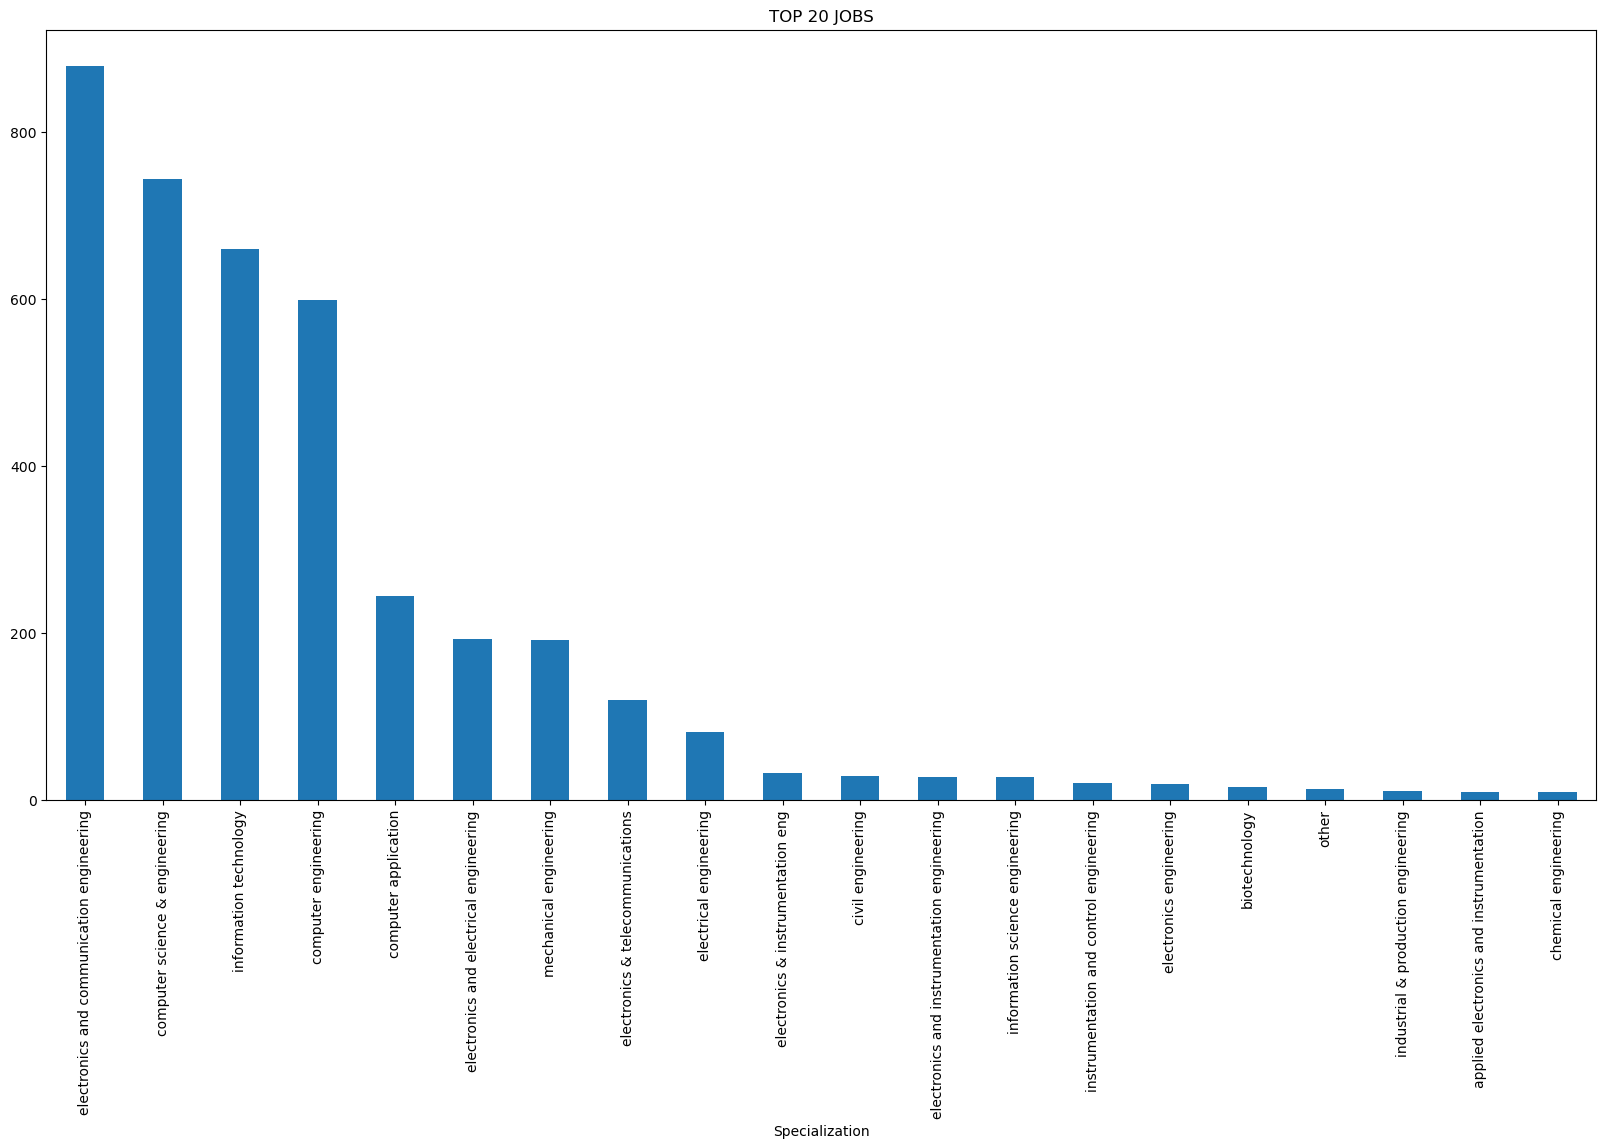

In [63]:
plt.figure(figsize=(20,10))
city=df['Specialization'].value_counts()[:20].plot.bar()
plt.title('TOP 20 JOBS')
plt.show()

- THE ELECTRONICS AND COMMUNICATION ENGINEERING ARE HIGHEST SPECIALIZATION.
- THIS COUNT PLOT SHOWS THE COUNT OF THE SPECIALIZATION.

### UNI-VARIATE ANALYSIS ON ENGLISH

In [64]:
fig = px.box(df['English'],orientation='h')
fig.show()

- THE MOST OF THE RANGE IS BETWEN 425 TO 570.
- THE LEAST VALUE IS 180.
- THE HIGHEST VALUE IS 875.
- THE MOST OUTLIERS FORMS POSITIVE SKEWNESS.

### UNI-VARIATE ANALYSIS ON LOGICAL

In [65]:
fig = px.box(df['Logical'],orientation='h')
fig.show()

- THE MOST OF THE RANGE IS BETWEN 445 TO 565.
- THE LEAST VALUE IS 195.
- THE HIGHEST VALUE IS 795.
- THE MOST OUTLIERS FORMS NEGATIVE SKEWNESS.

### UNI-VARIATE ANALYSIS ON QUANT

In [66]:
fig = px.box(df['Quant'],orientation='h')
fig.show()

- THE MOST OF THE RANGE IS BETWEN 430 TO 595.
- THE LEAST VALUE IS 120.
- THE HIGHEST VALUE IS 900.



### UNI-VARIATE ANALYSIS ON TOP 20 JOB-CITIES

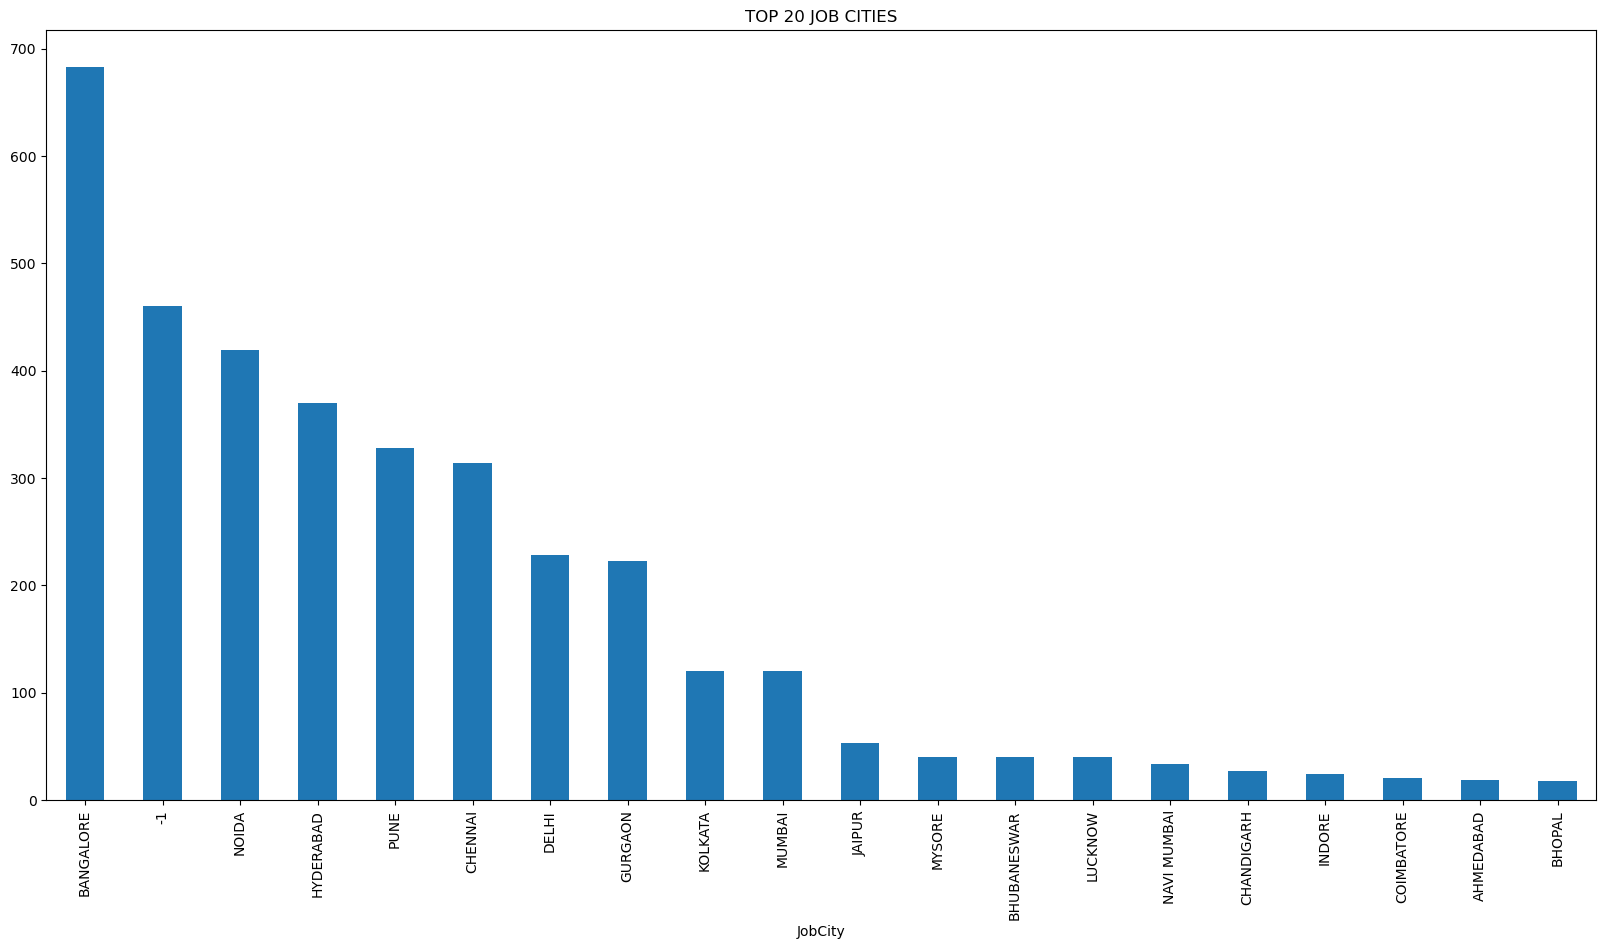

In [67]:
plt.figure(figsize=(20,10))
city=df['JobCity'].value_counts()[:20].plot.bar()
plt.title('TOP 20 JOB CITIES')
plt.show()

- THIS ARE THE TOP 20 JOB-CITIES.
- BANGOLORE IS THE HIGHEST JOB-CITY.
- GHAZIABAD IS THE LEAST JOB-CITY.

### UNI-VARIATE ANALYSIS ON TOP 20 JOB DESIGNATION.

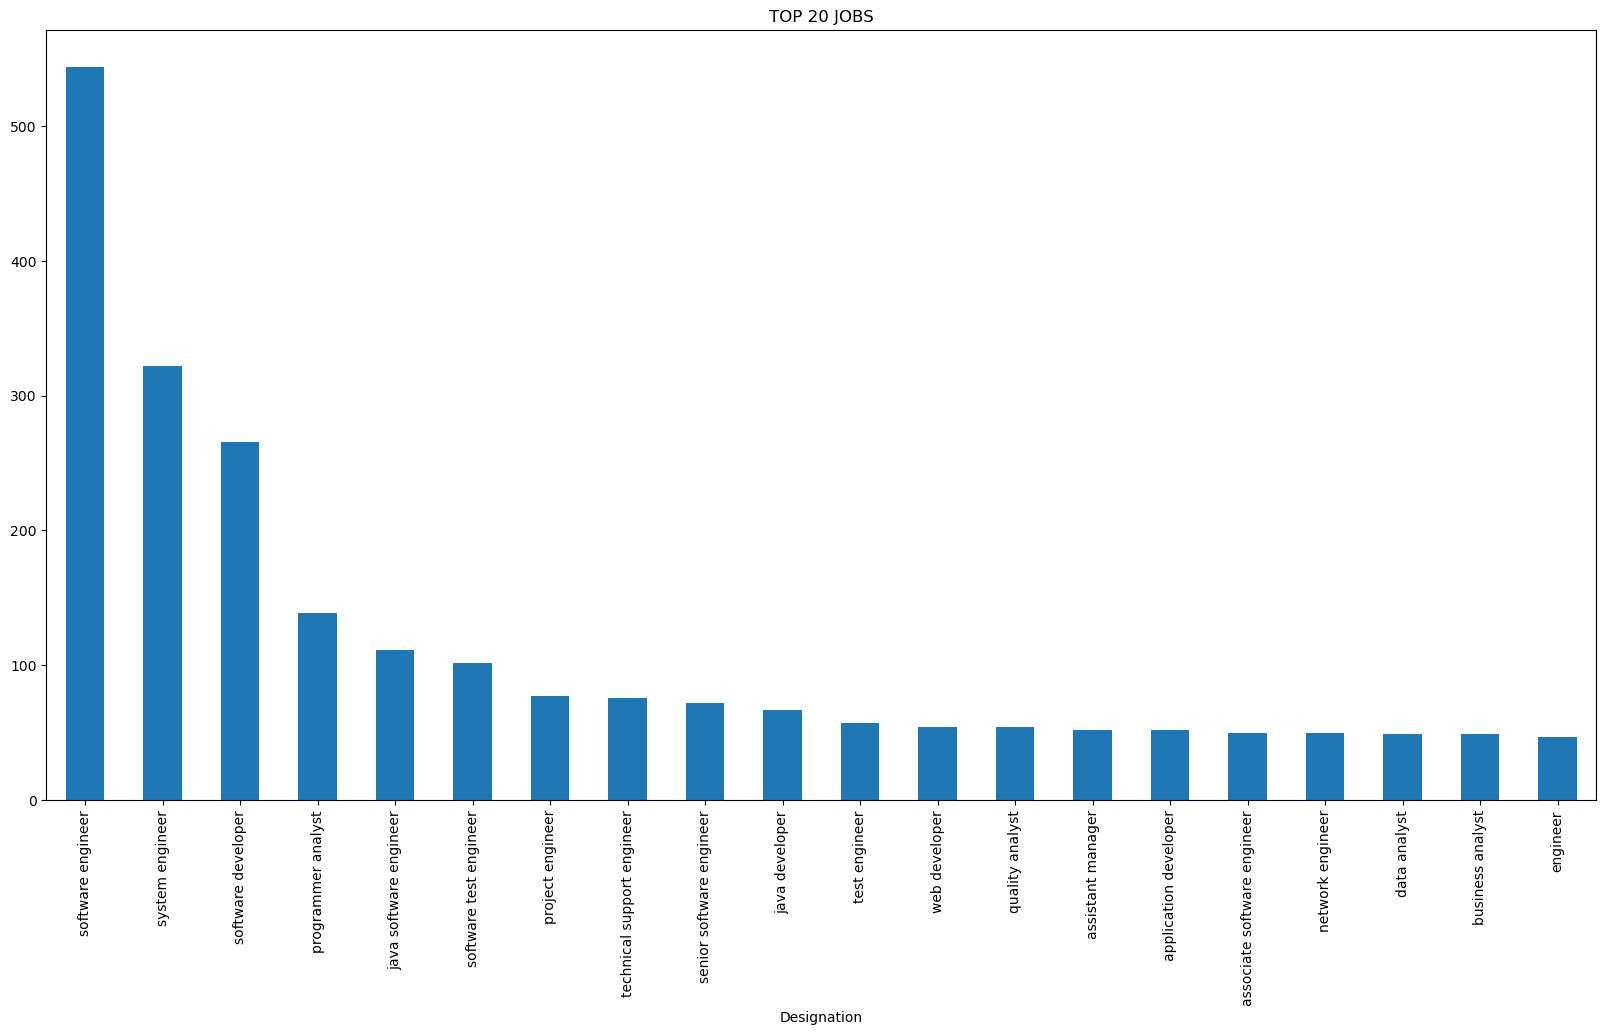

In [68]:
plt.figure(figsize=(20,10))
city=df['Designation'].value_counts()[:20].plot.bar()
plt.title('TOP 20 JOBS')
plt.show()

- THE HIGHEST COUNT DESIGNATION IS SOFTWARE ENGINEER.
- THIS COUNT PLOT SHOW TOP 20 JOBS DESIGNATION.

### UNI-VARIATE ANALYSIS ON EXPERIENCE

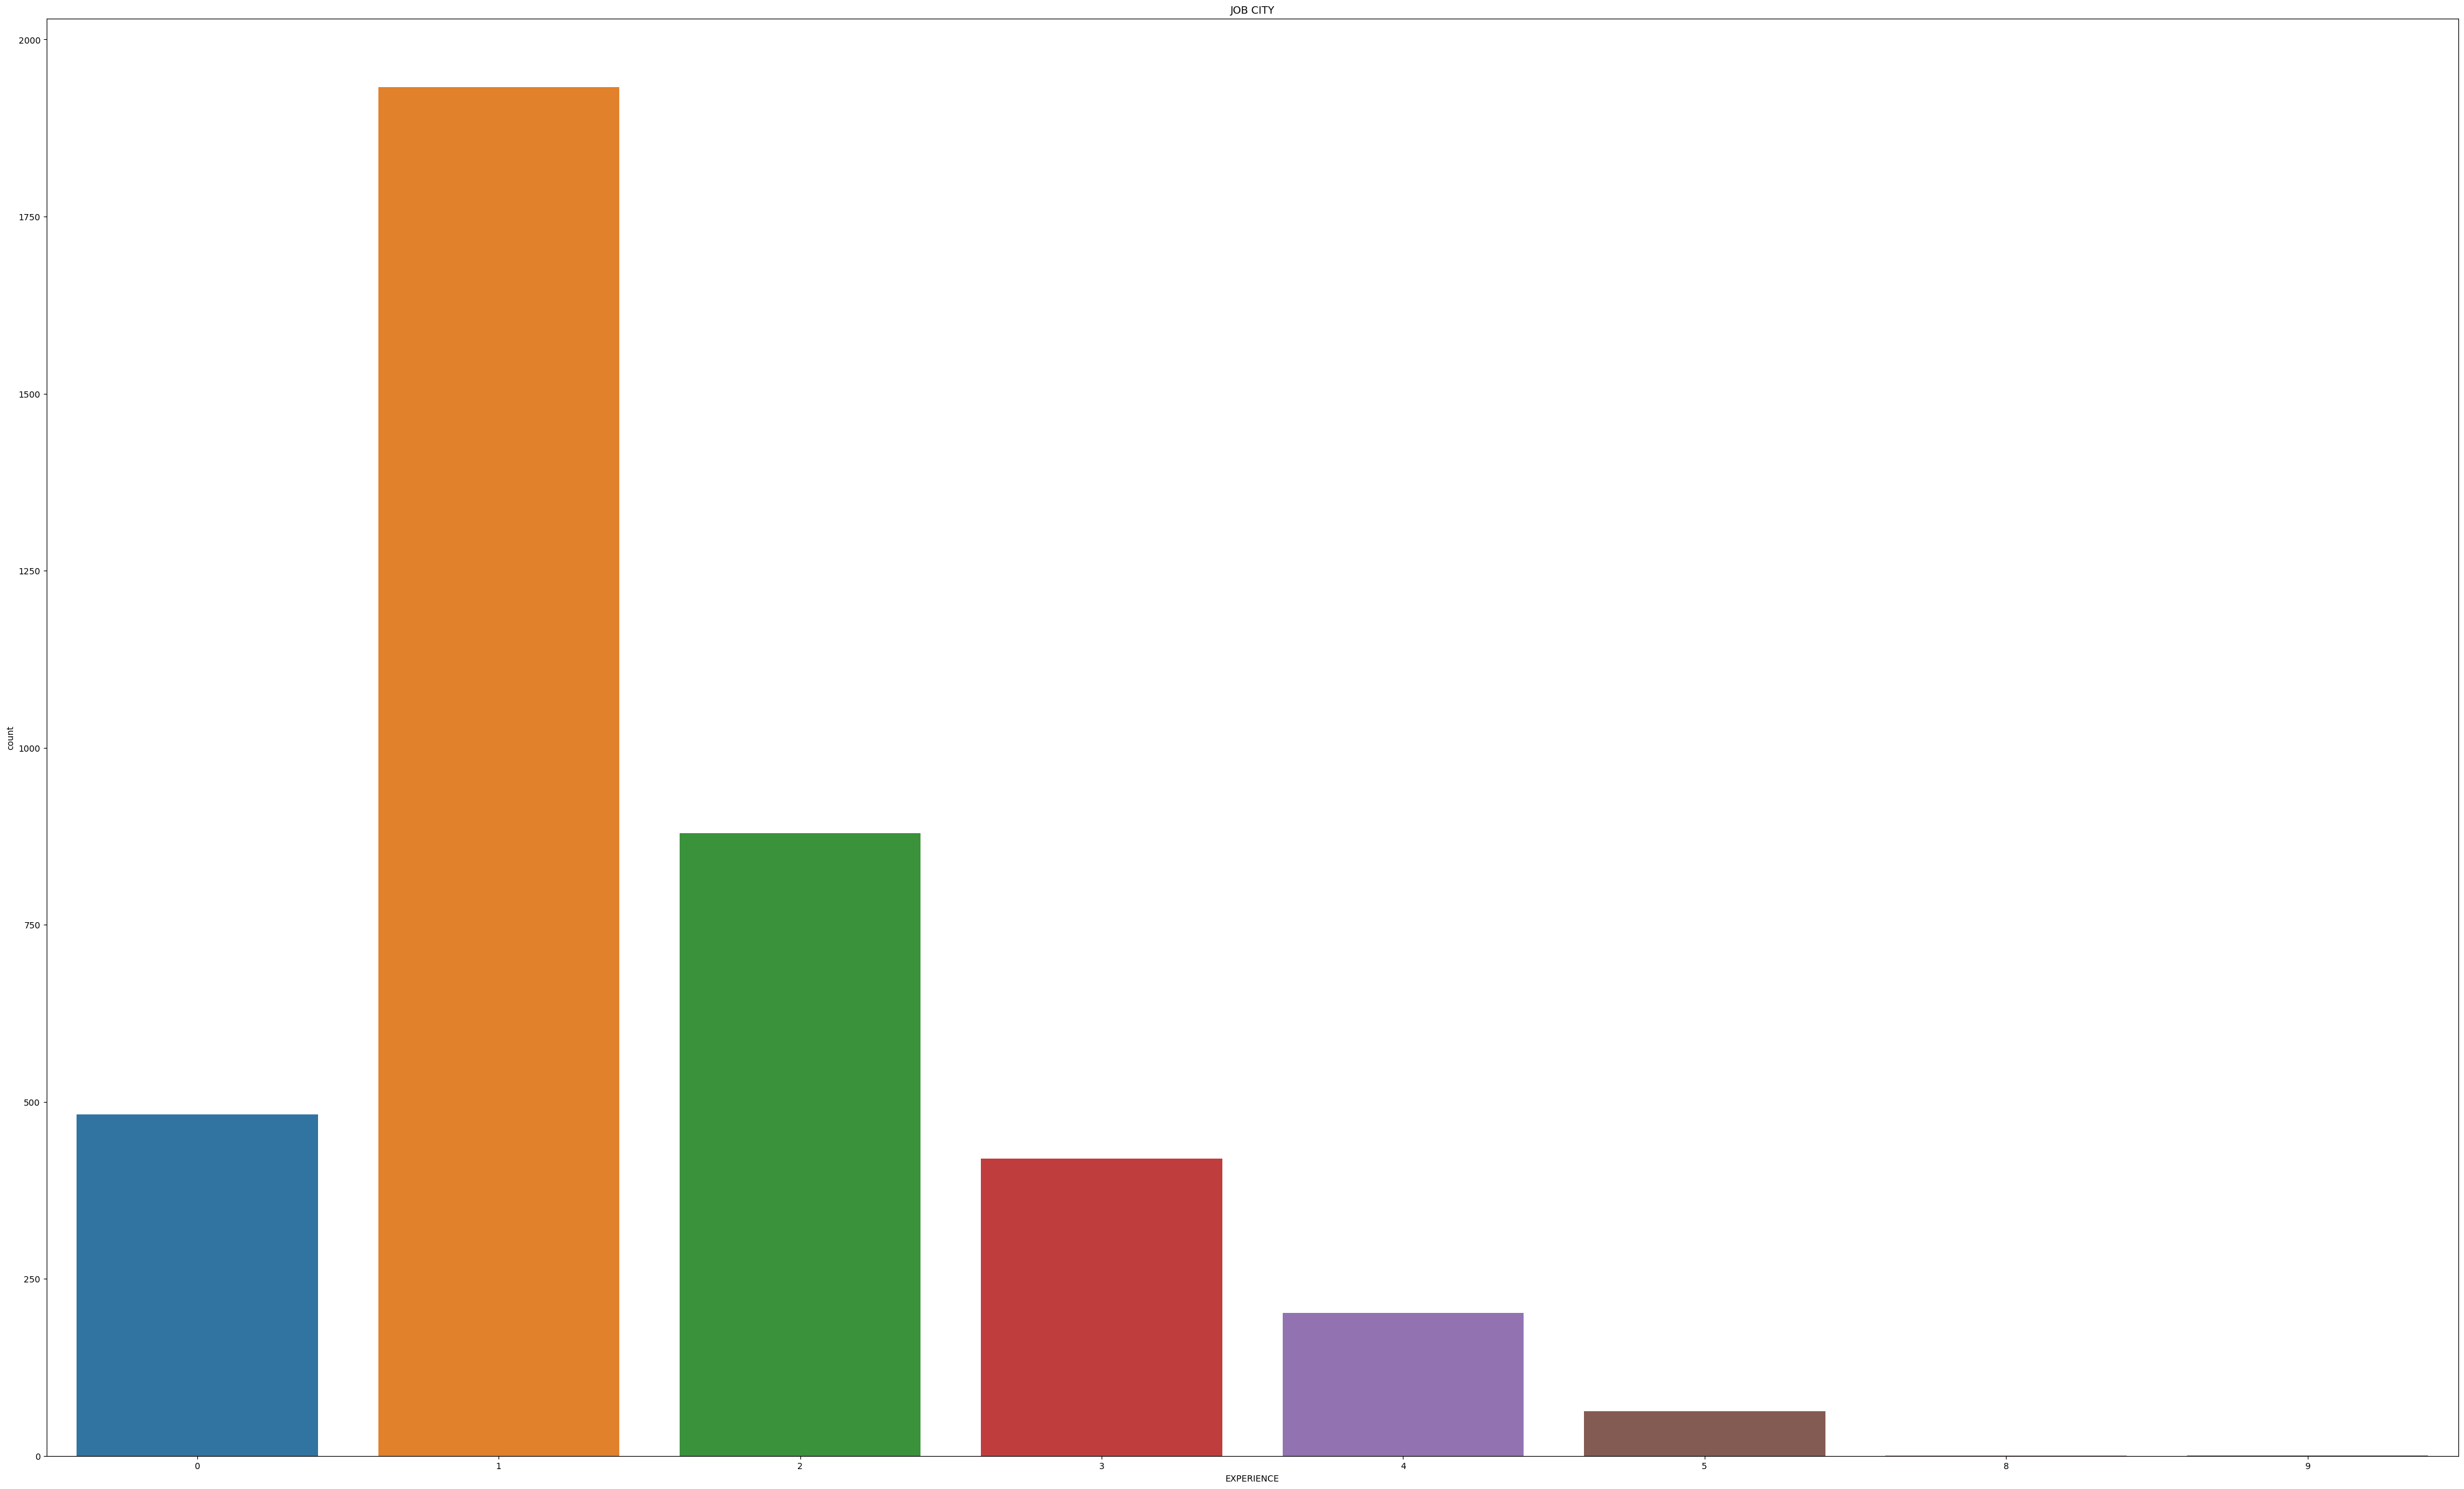

In [69]:
plt.figure(figsize=(50,30))
sns.countplot(x='EXPERIENCE',data=df)
plt.title('JOB CITY')
plt.show()

- ONE YEAR EXPERIENCE EMPLOYEES ARE MORE.
- EIGHT AND NINE YEARS EXPERIENCE EMPLOYEES ARE LESS.

### UNI-VARIATE ANALYSIS ON AGE

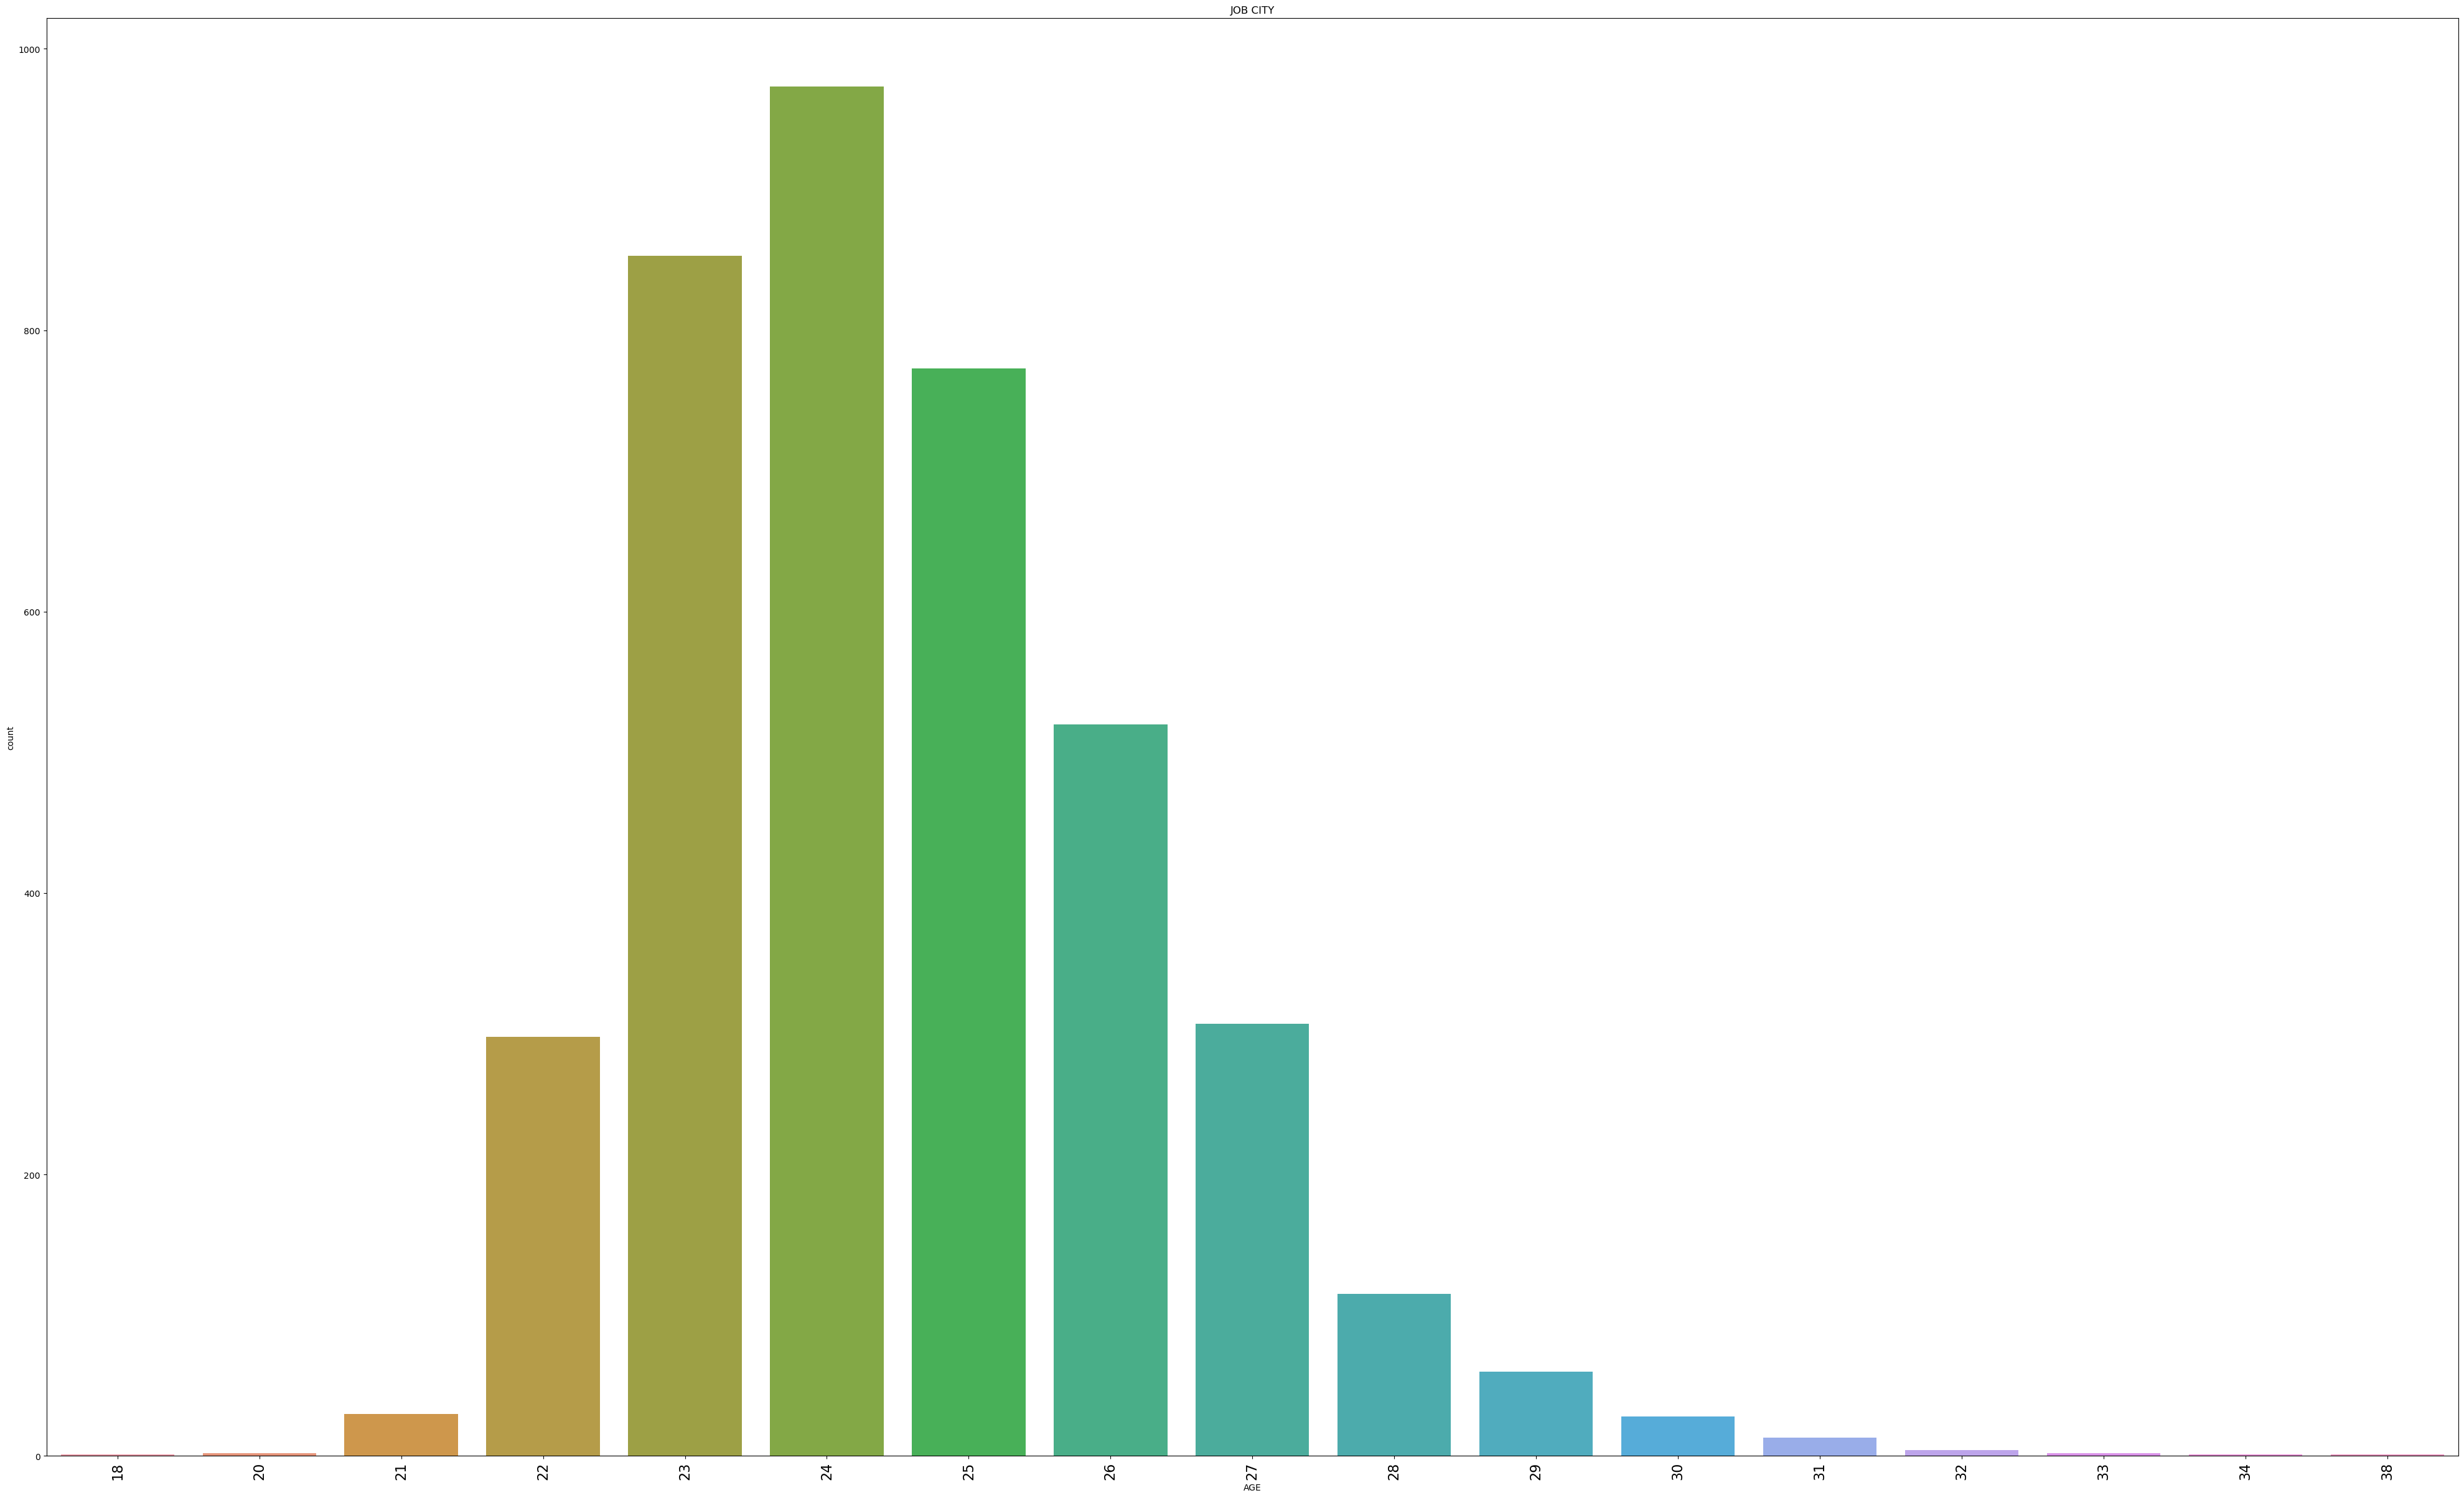

In [70]:
plt.figure(figsize=(50,30))
sns.countplot(x='AGE',data=df)
plt.xticks(rotation=90,fontsize=16)
plt.title('JOB CITY')
plt.show()

- MOST OF AGES ARE RANGE BETWEEN 22 TO 27
- THE 24 YEARS OF AGE ARE MORE.

##  Bivariate Analysis

<Axes: xlabel='Salary', ylabel='collegeGPA'>

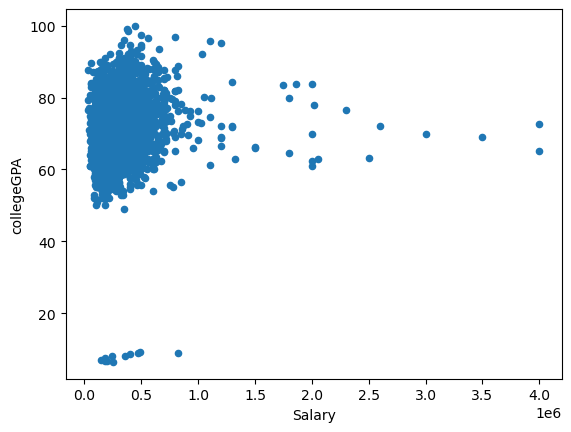

In [72]:
df.plot.scatter('Salary','collegeGPA')

In [73]:
df

Salary                  Designation    JobCity Gender  10percentage  \
0      420000.0      senior quality engineer  BANGALORE      f         84.30   
1      500000.0            assistant manager     INDORE      m         85.40   
2      325000.0              system engineer    CHENNAI      f         85.00   
3     1100000.0     senior software engineer    GURGAON      m         85.60   
5      300000.0              system engineer  HYDERABAD      m         89.92   
...         ...                          ...        ...    ...           ...   
3993   280000.0            software engineer      DELHI      m         52.09   
3994   100000.0             technical writer  HYDERABAD      f         90.00   
3995   320000.0  associate software engineer  BANGALORE      m         81.86   
3996   200000.0           software developer  BANGALORE      f         78.72   
3997   400000.0       senior system engineer    CHENNAI      f         70.60   

                             10board  12graduation  12percentage  \
0     board ofsecondary education,ap          2007         95.80   
1                               cbse          2007         85.00   
2                               cbse          2010         68.20   
3                               cbse          2007         83.60   
5                        state board          2010         87.00   
...                              ...           ...           ...   
3993                            cbse          2006         55.50   
3994                     state board          2009         93.00   
3995                      bse,odisha          2008         65.50   
3996                     state board          2010         69.88   
3997                            cbse          2008         68.00   

                                 12board  CollegeID  ...  English Logical  \
0     board of intermediate education,ap       1141  ...      515     585   
1                                   cbse       5807  ...      695     610   
2                                   cbse         64  ...      615     545   
3                                   cbse       6920  ...      635     585   
5                            state board       5086  ...      560     555   
...                                  ...        ...  ...      ...     ...   
3993                                cbse       6268  ...      365     334   
3994                         state board       4883  ...      415     410   
3995                         chse,odisha       9786  ...      475     475   
3996                         state board        979  ...      450     410   
3997                                cbse       6609  ...      565     515   

     Quant  conscientiousness agreeableness  extraversion  nueroticism  \
0      525             0.9737        0.8128        0.5269      1.35490   
1      780            -0.7335        0.3789        1.2396     -0.10760   
2      370             0.2718        1.7109        0.1637     -0.86820   
3      625             0.0464        0.3448       -0.3440     -0.40780   
5      620            -0.3027       -0.6201       -2.2954     -0.74150   
...    ...                ...           ...           ...          ...   
3993   475            -0.1082        0.3448        0.2366      0.64980   
3994   535            -0.3027        0.8784        0.9322      0.77980   
3995   465            -1.5765       -1.5273       -1.5051     -1.31840   
3996   320            -0.1590        0.0459       -0.4511     -0.36120   
3997   464            -1.1128       -0.2793       -0.6343      1.32553   

      openess_to_experience  EXPERIENCE  AGE  
0                   -0.4455           3   25  
1                    0.8637           2   26  
2                    0.6721           1   23  
3                   -0.9194           4   26  
5                   -0.8608           1   23  
...                     ...         ...  ...  
3993                -0.9194           1   28  
3994                -0.0943           0  

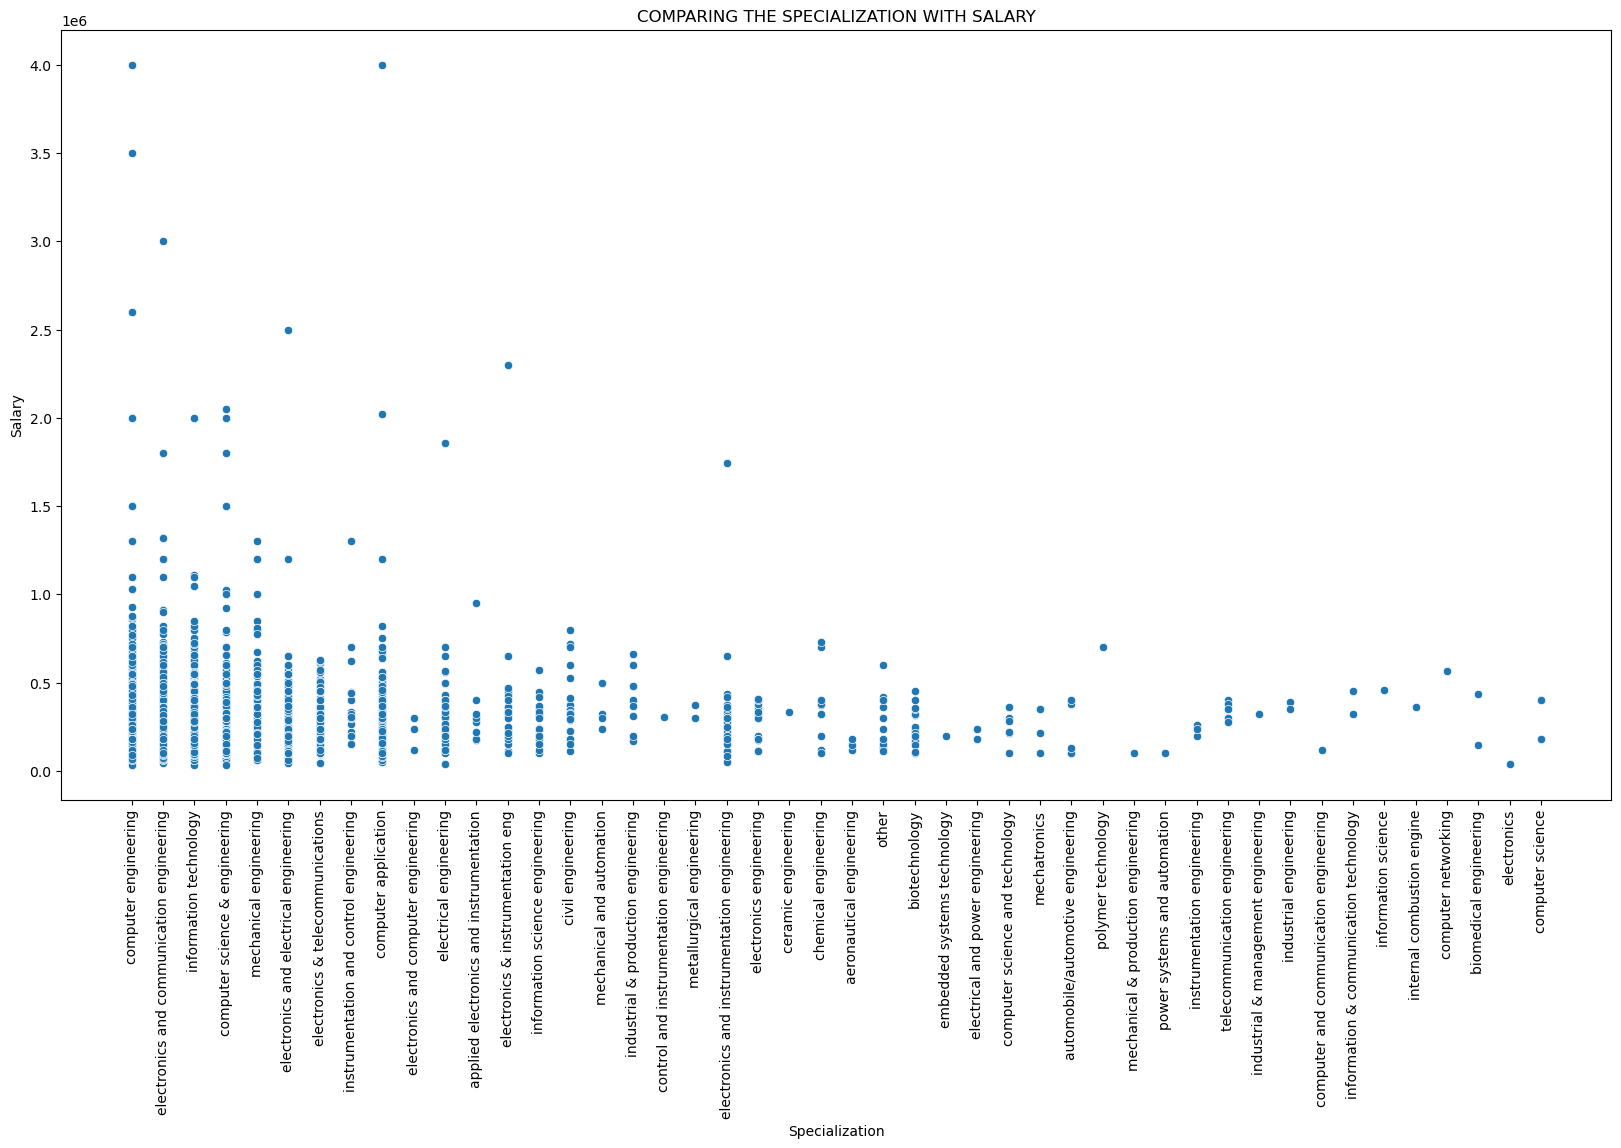

In [74]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Specialization',y='Salary',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SPECIALIZATION WITH SALARY')
plt.show()

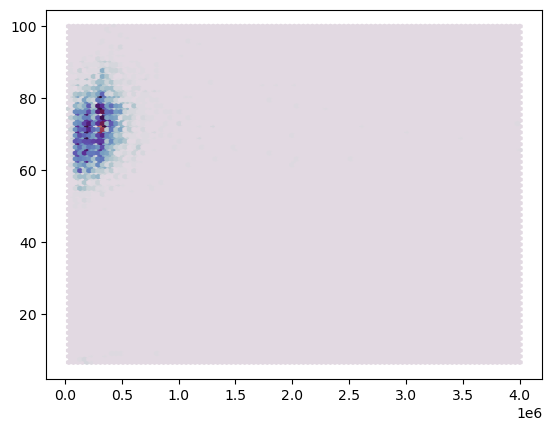

In [75]:
plt.hexbin(x = 'Salary',y = 'collegeGPA',data = df,cmap='twilight')
plt.show()

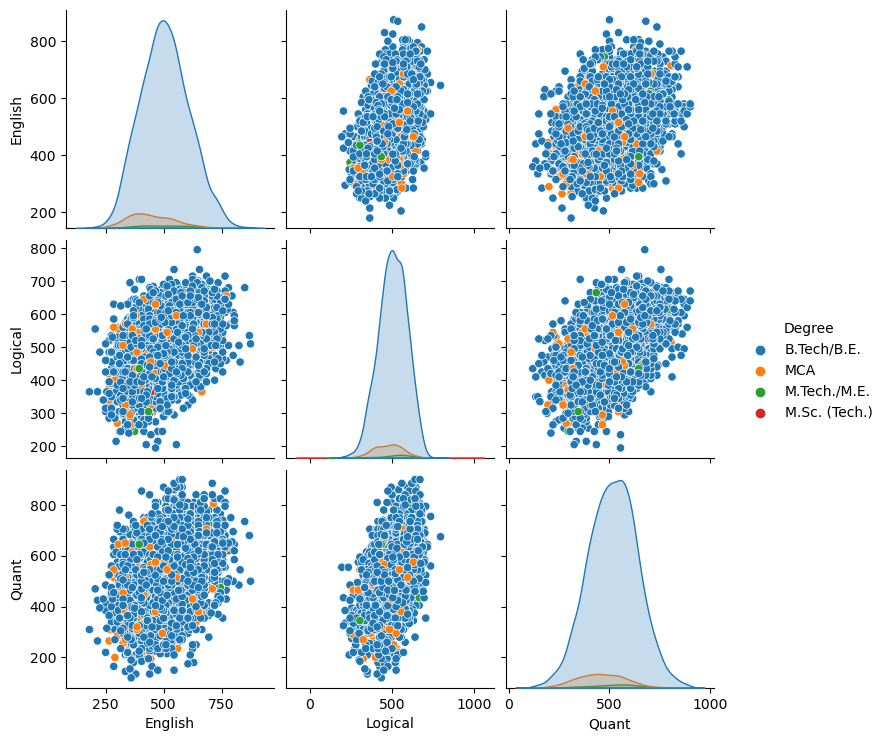

In [76]:
sns.pairplot(df,x_vars=['English','Logical','Quant'],y_vars=['English','Logical','Quant'],hue='Degree')
plt.show()

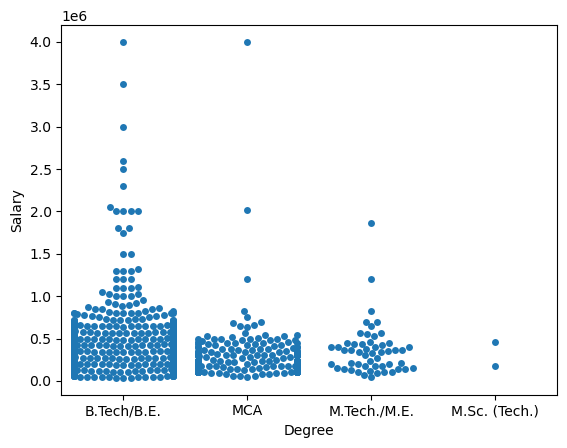

In [77]:
sns.swarmplot(x='Degree',y='Salary',data=df)
plt.show()

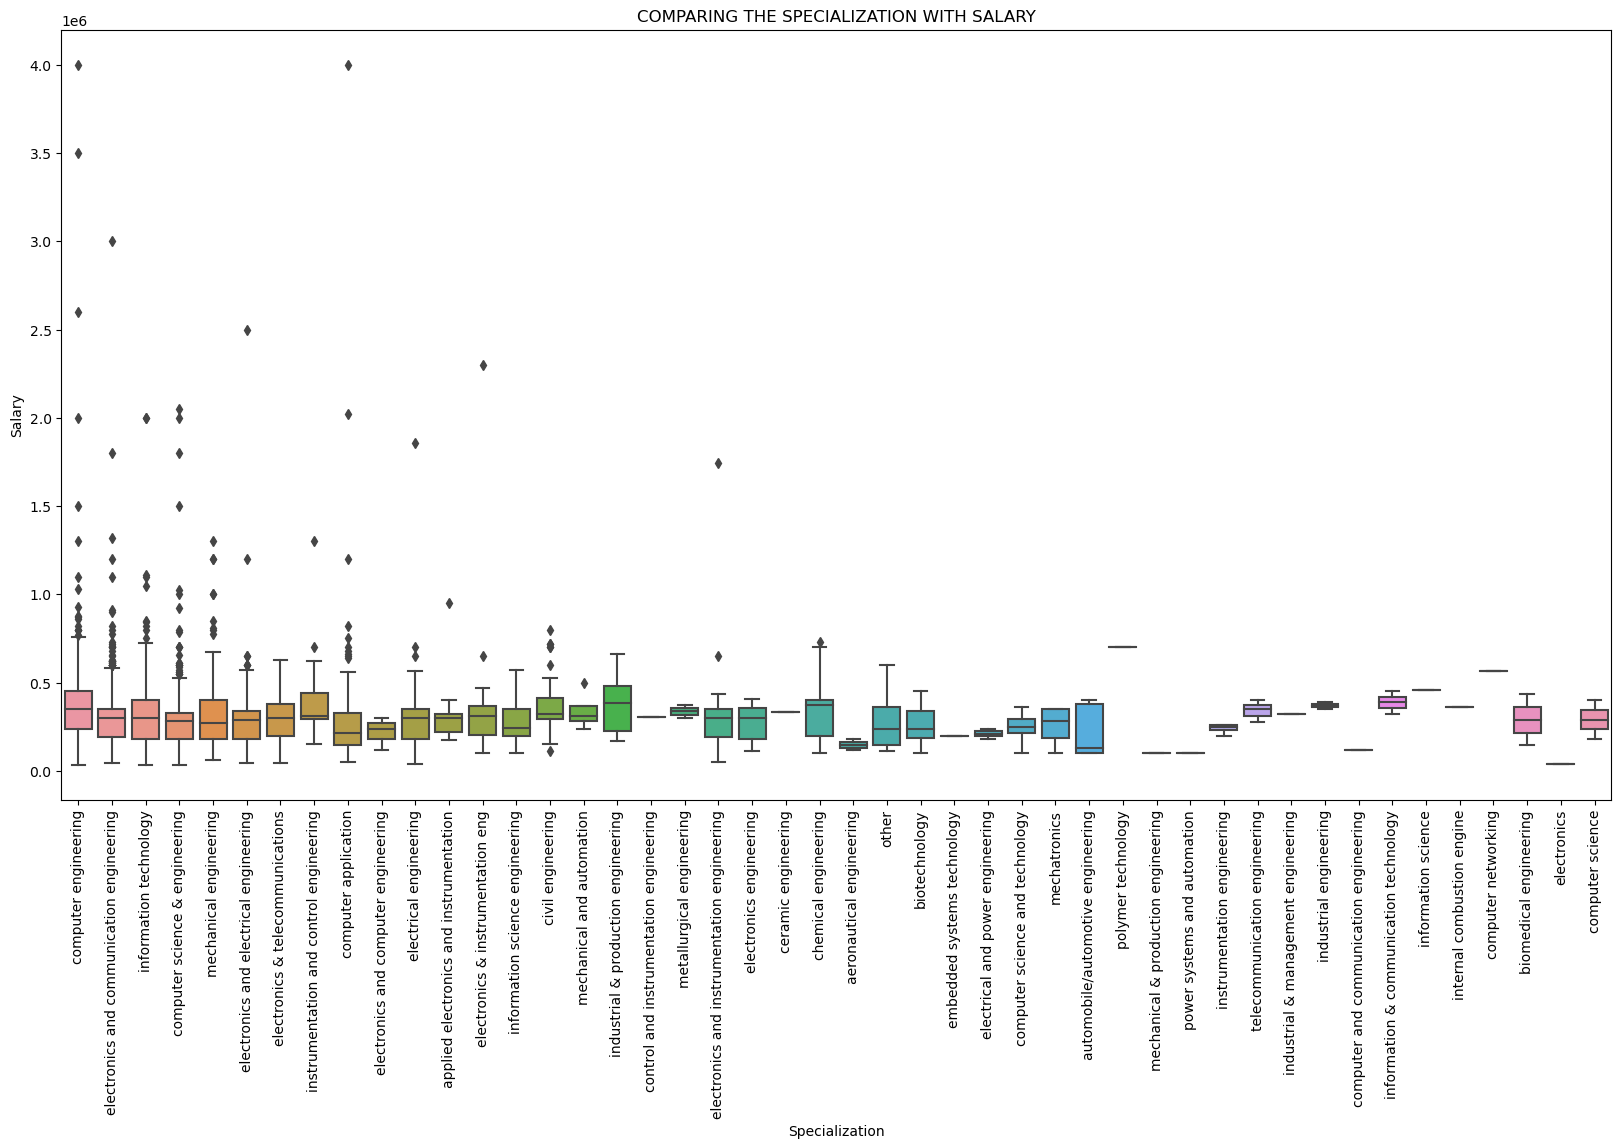

In [78]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Specialization',y='Salary',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SPECIALIZATION WITH SALARY')
plt.show()

In [79]:
df1=df[df['Salary']> 700000]

In [80]:
df1

Salary                 Designation      JobCity Gender  10percentage  \
3     1100000.0    senior software engineer      GURGAON      m         85.60   
76     800000.0           software engineer    BANGALORE      m         93.44   
92    1500000.0       application developer    HYDERABAD      m         79.00   
123   1200000.0            engineer trainee  MAHARAJGANJ      m         59.80   
166   1860000.0              field engineer       MUMBAI      f         89.70   
...         ...                         ...          ...    ...           ...   
3710  1100000.0    senior software engineer    BANGALORE      m         83.80   
3823   775000.0  mechanical design engineer       ABOARD      m         87.40   
3904   850000.0        operations assistant        NOIDA      m         83.40   
3912   730000.0          research scientist         PUNE      m         84.67   
3992   800000.0                     manager       RAJKOT      m         73.00   

                    10board  12graduation  12percentage  \
3                      cbse          2007         83.60   
76    karnataka state board          2008         90.00   
92              state board          2009         87.90   
123                    icse          2006         60.25   
166                       0          2007         89.60   
...                     ...           ...           ...   
3710                   cbse          2007         63.40   
3823                   cbse          2008         63.00   
3904                   cbse          2007         78.00   
3912                      0          2006         86.46   
3992                      0          2008         54.00   

                    12board  CollegeID  ...  English Logical Quant  \
3                      cbse       6920  ...      635     585   625   
76    karnataka state board       1384  ...      515     475   635   
92              state board       9557  ...      315     435   355   
123                     isc       5690  ...      575     595   405   
166                       0        443  ...      625     555   625   
...                     ...        ...  ...      ...     ...   ...   
3710                   cbse       1648  ...      665     615   515   
3823                   cbse      11973  ...      580     555   410   
3904                   cbse       7564  ...      465     475   404   
3912                      0        264  ...      545     525   715   
3992                      0        124  ...      405     345   525   

      conscientiousness agreeableness  extraversion  nueroticism  \
3                0.0464        0.3448       -0.3440     -0.40780   
76              -0.4173        0.9688       -0.1988     -0.29020   
92               0.4155        0.5454        0.9322     -0.61470   
123              0.2009        1.1248        1.1074     -1.11280   
166             -1.3447        0.6178       -1.4688      0.88483   
...                 ...           ...           ...          ...   
3710            -0.8810        0.5008       -0.6343     -1.34780   
3823            -0.8772       -0.1206       -0.1437     -0.23440   
3904            -0.8810        0.1888       -0.1988     -0.05520   
3912            -1.3447       -1.0593        0.6720      1.00240   
3992             0.3555       -0.9033        0.9623      0.64983   

      openess_to_experience  EXPERIENCE  AGE  
3                   -0.9194           4   26  
76                   0.3049           3   24  
92                   0.8637           0   23  
123                  0.9763           1   27  
166                  0.6603           2   26  
...                     ...         ...  ...  
3710                -0.6035           4   26  
3823                -0.0943           1   24  
3904                -1.0774           4   26  
3912                -1.7093           2   26  
3992                -0.4229           1   25  

[81 rows x 26 columns]

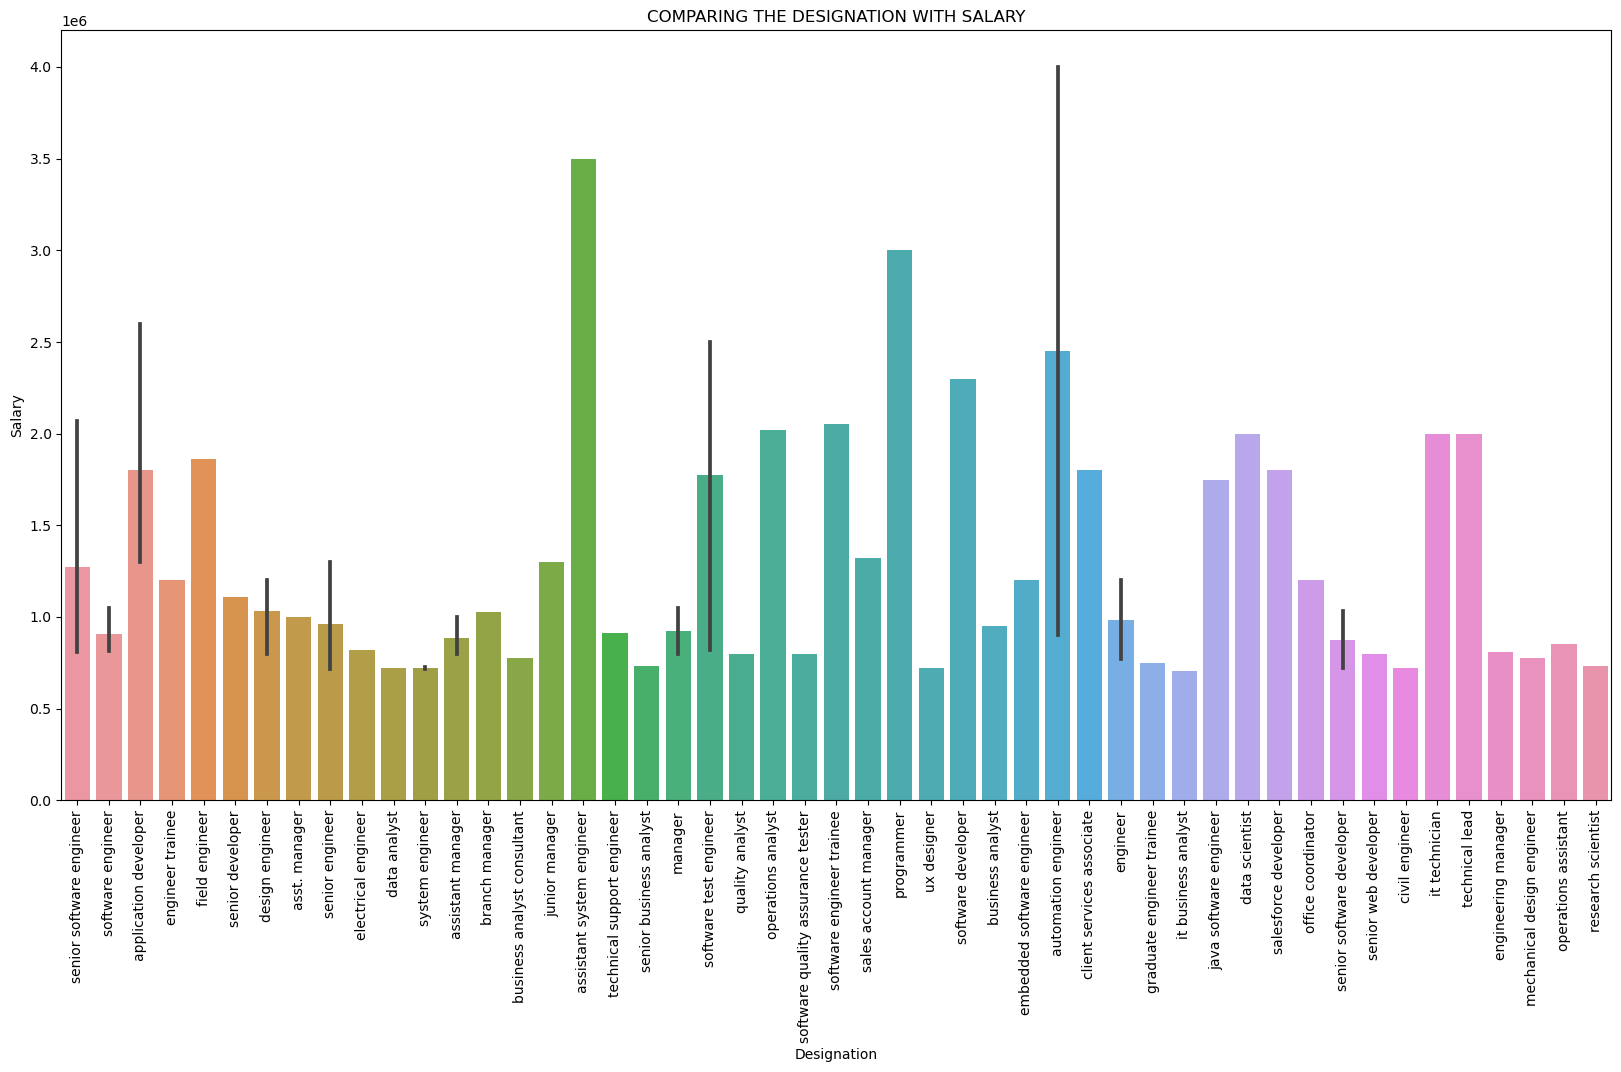

In [81]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',data=df1)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE DESIGNATION WITH SALARY')
plt.show()

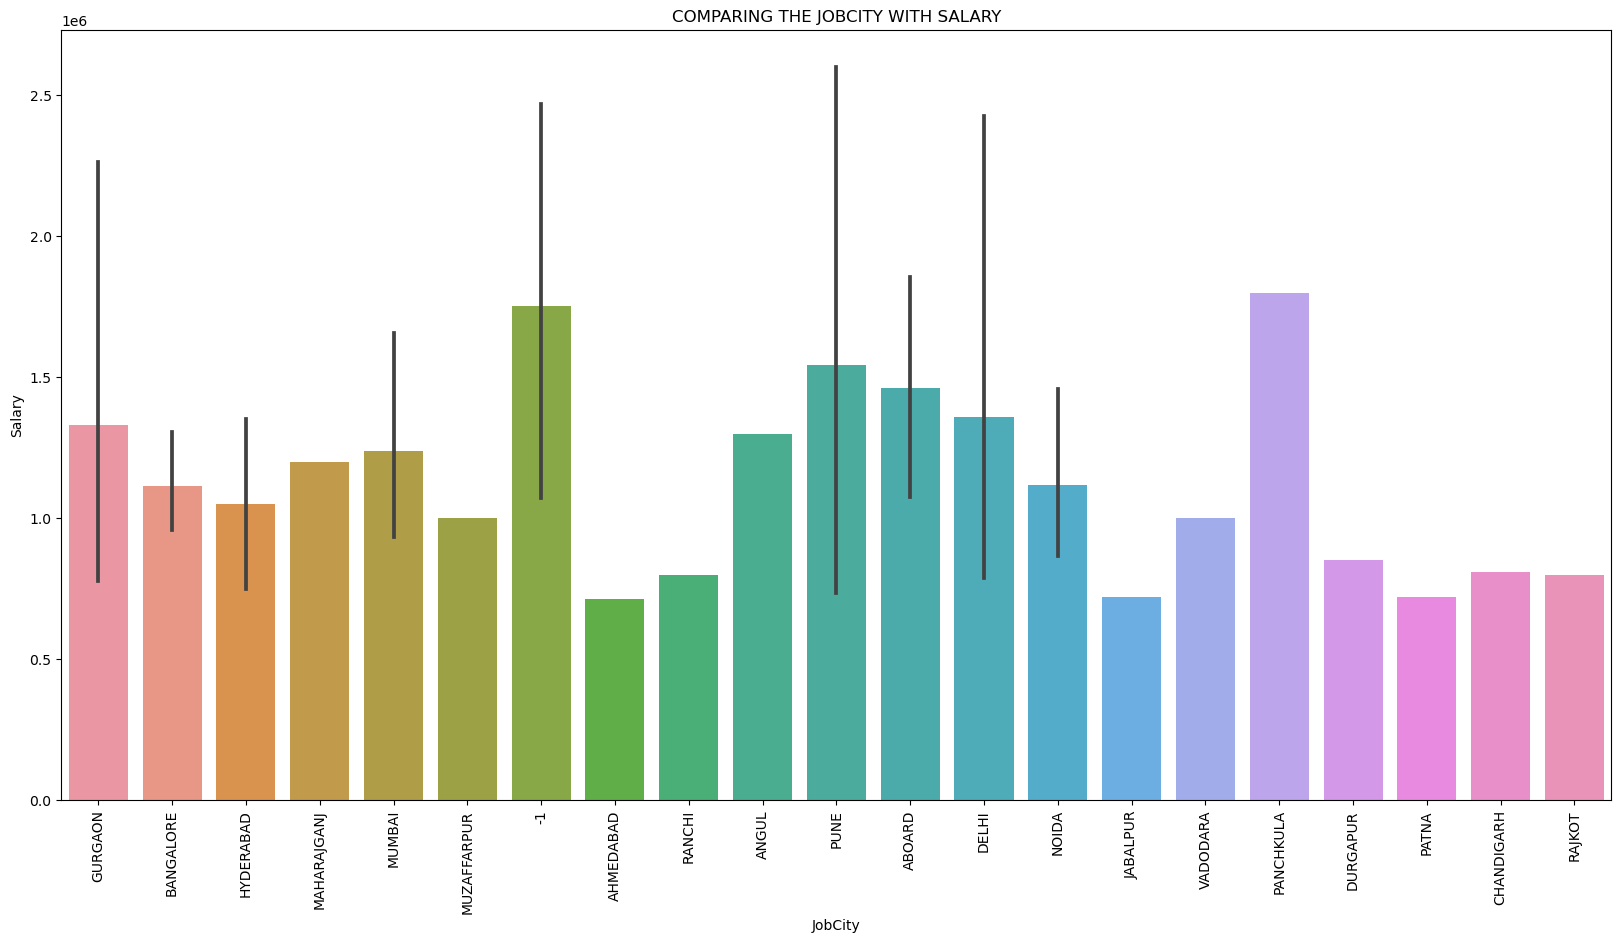

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(x='JobCity',y='Salary',data=df1)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE JOBCITY WITH SALARY')
plt.show()

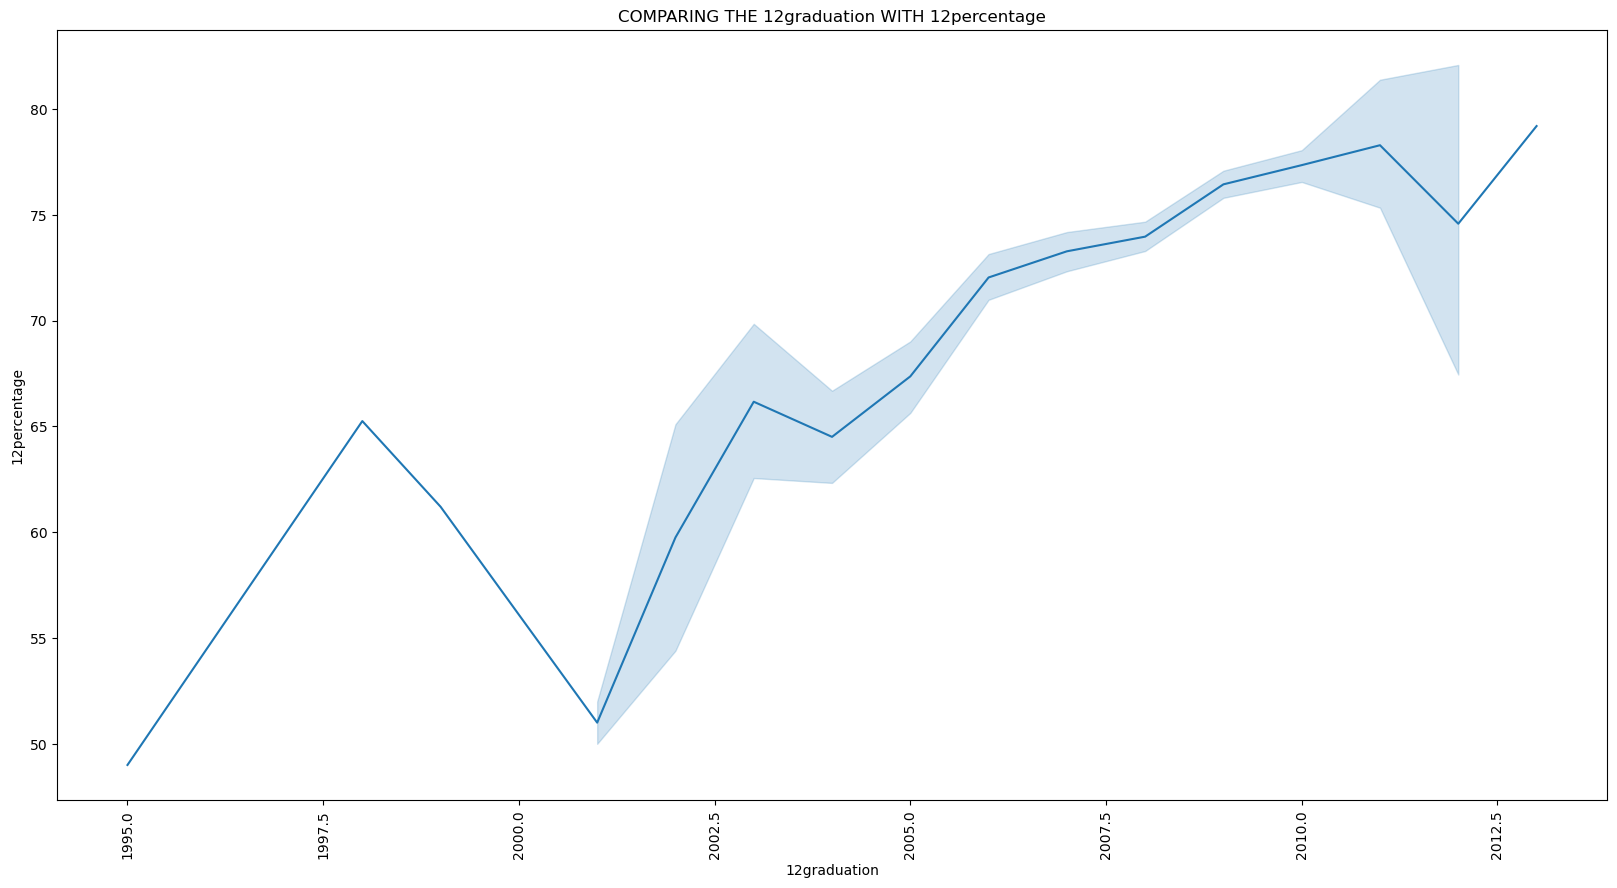

In [83]:
plt.figure(figsize=(20,10))
sns.lineplot(x='12graduation',y='12percentage',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE 12graduation WITH 12percentage')
plt.show()

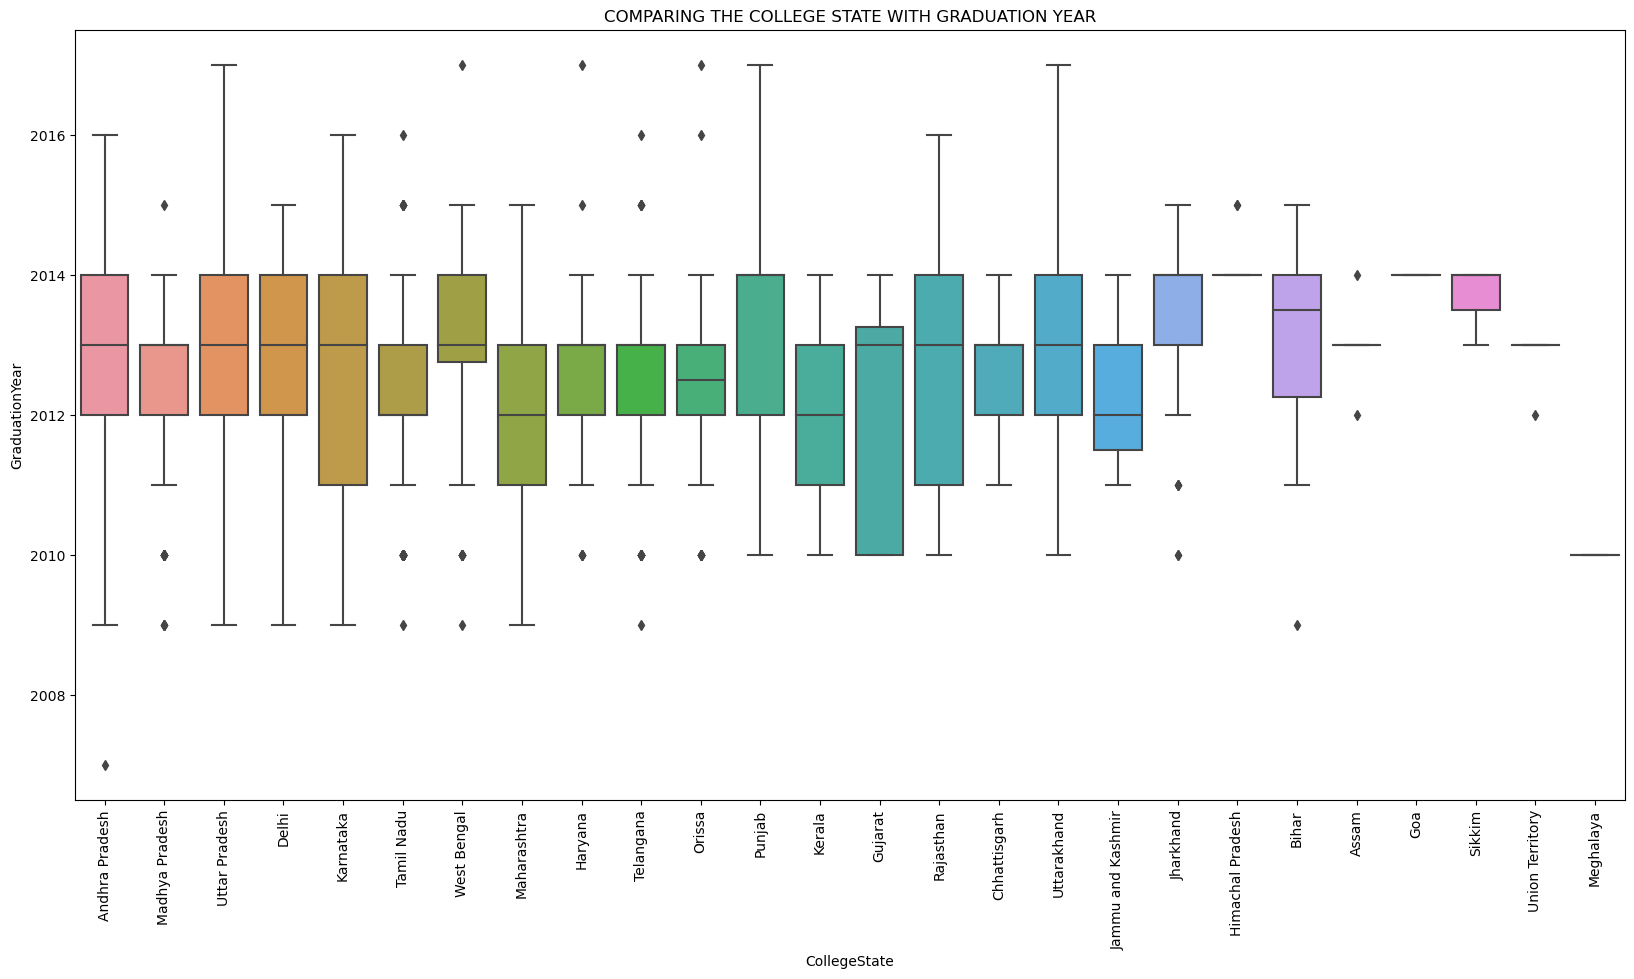

In [84]:
plt.figure(figsize=(20,10))
sns.boxplot(x='CollegeState',y='GraduationYear',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE COLLEGE STATE WITH GRADUATION YEAR')
plt.show()

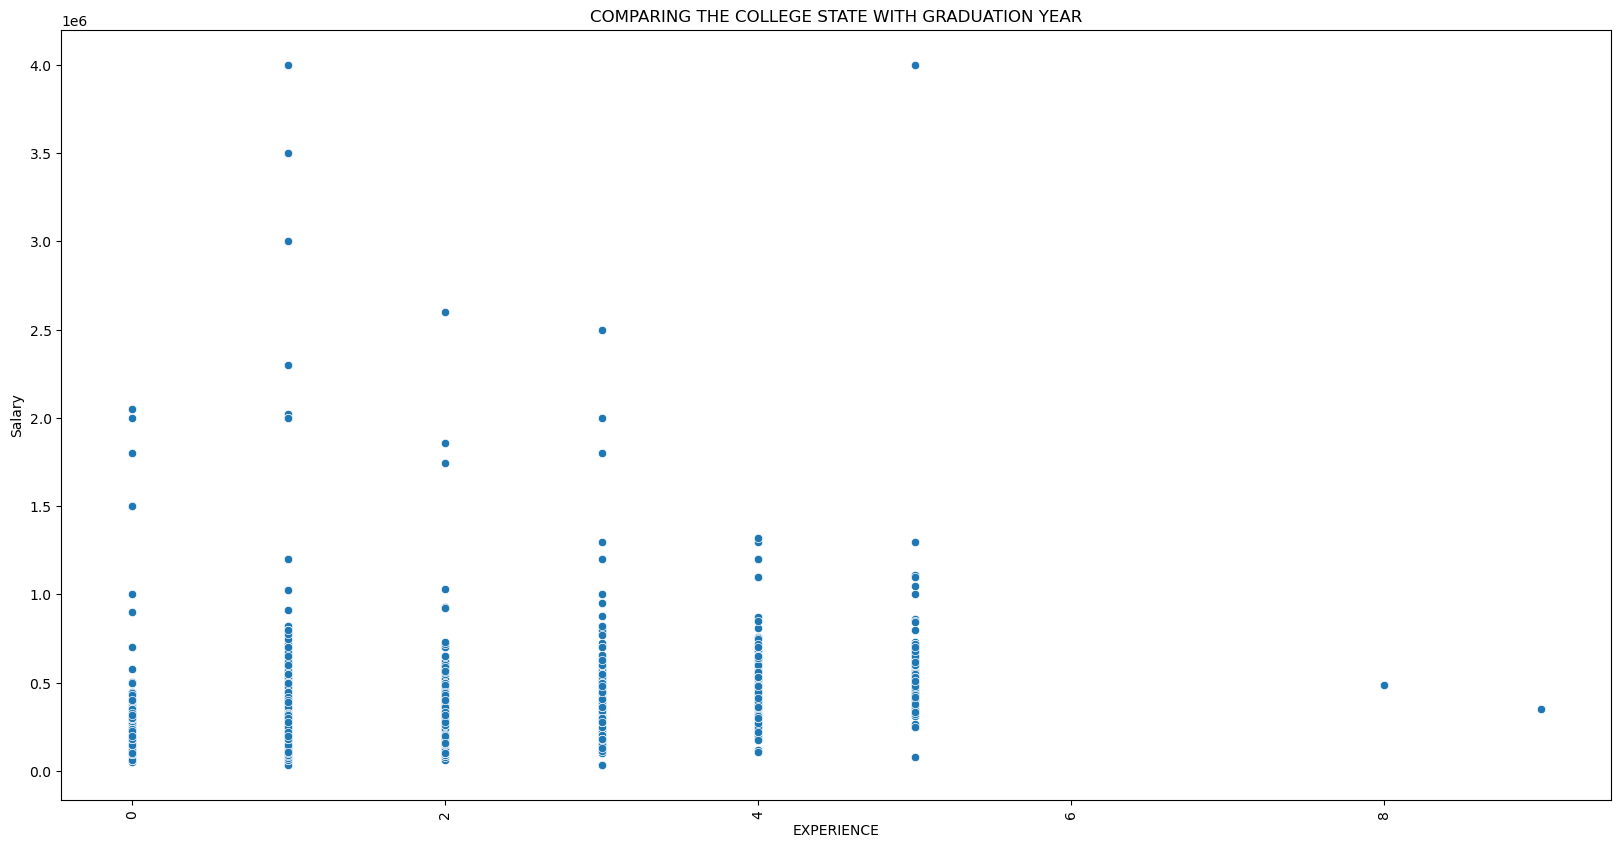

In [85]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='EXPERIENCE',y='Salary',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE COLLEGE STATE WITH GRADUATION YEAR')
plt.show()

### MULTI-VARIANT

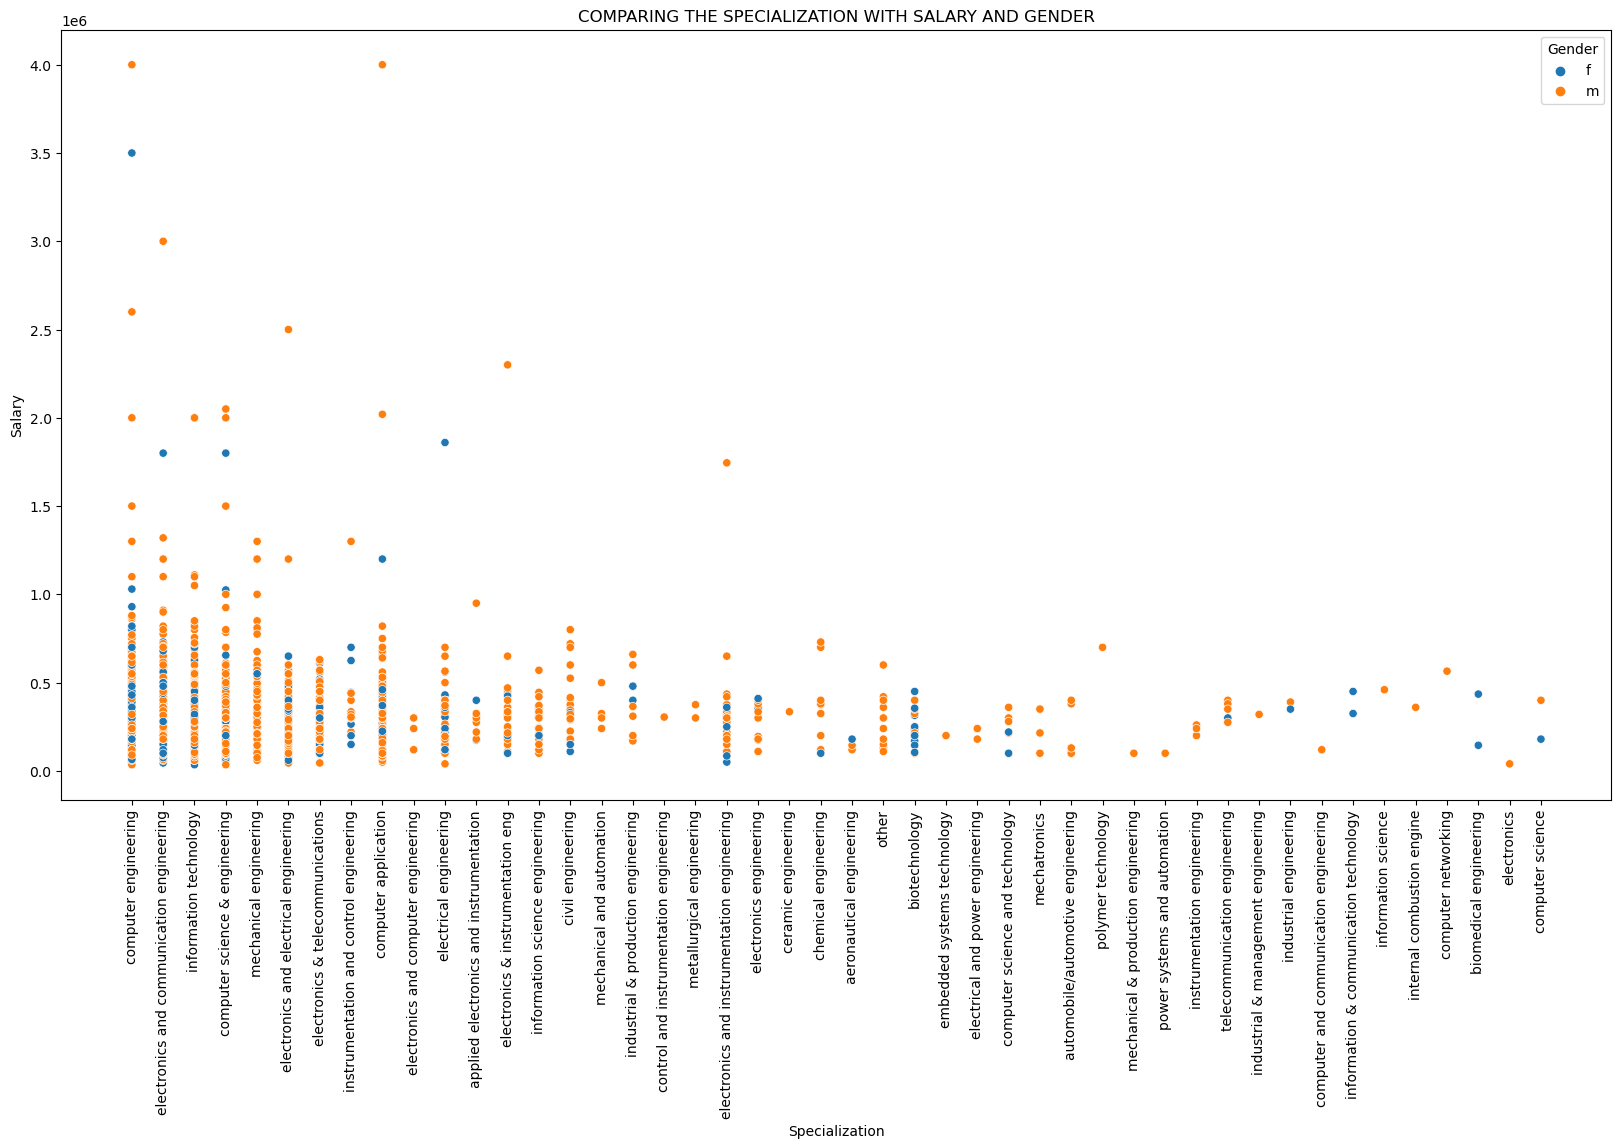

In [86]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Specialization',y='Salary',data=df,hue='Gender')
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SPECIALIZATION WITH SALARY AND GENDER')
plt.show()

- COMPUTER ENGINEERING AND COMPUTER APPLICATION ARE GETTING HIGH SALARIES.
- IN ALL OF THE SPECIALIZATION GENDERS ARE MOSTLY MALE.
- COMPUTER ENGINNERING , ELECTRONICS AND COMMUNICATION, INFORMATION TECHNOLOGY, COMPUTER SCIENCE      ENGINEERING ARE MORE.

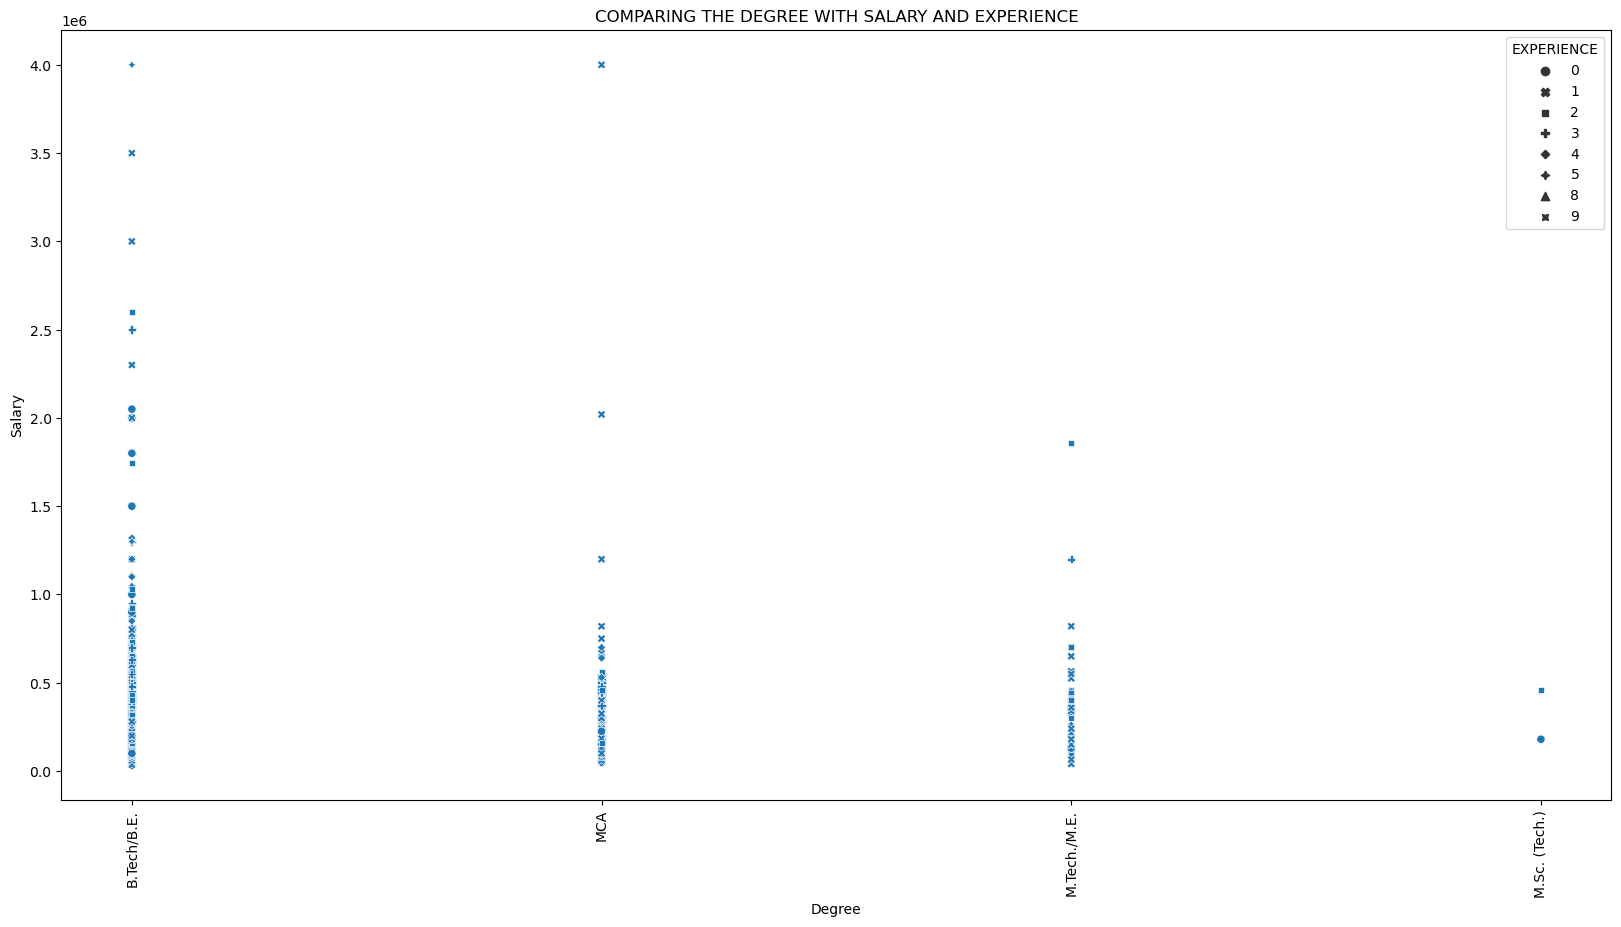

In [87]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Degree',y='Salary',data=df,style='EXPERIENCE')
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE DEGREE WITH SALARY AND EXPERIENCE')
plt.show()

- IN B.TECH\B.E EXPERIENCE AND FRESHERS ARE MORE.
- IN M.SC EXPERIENCE AND FRESHERS ARE LESS.
- FOR B.TECH\B.E AND MCA ARE GETTING HIGH SALARIES.


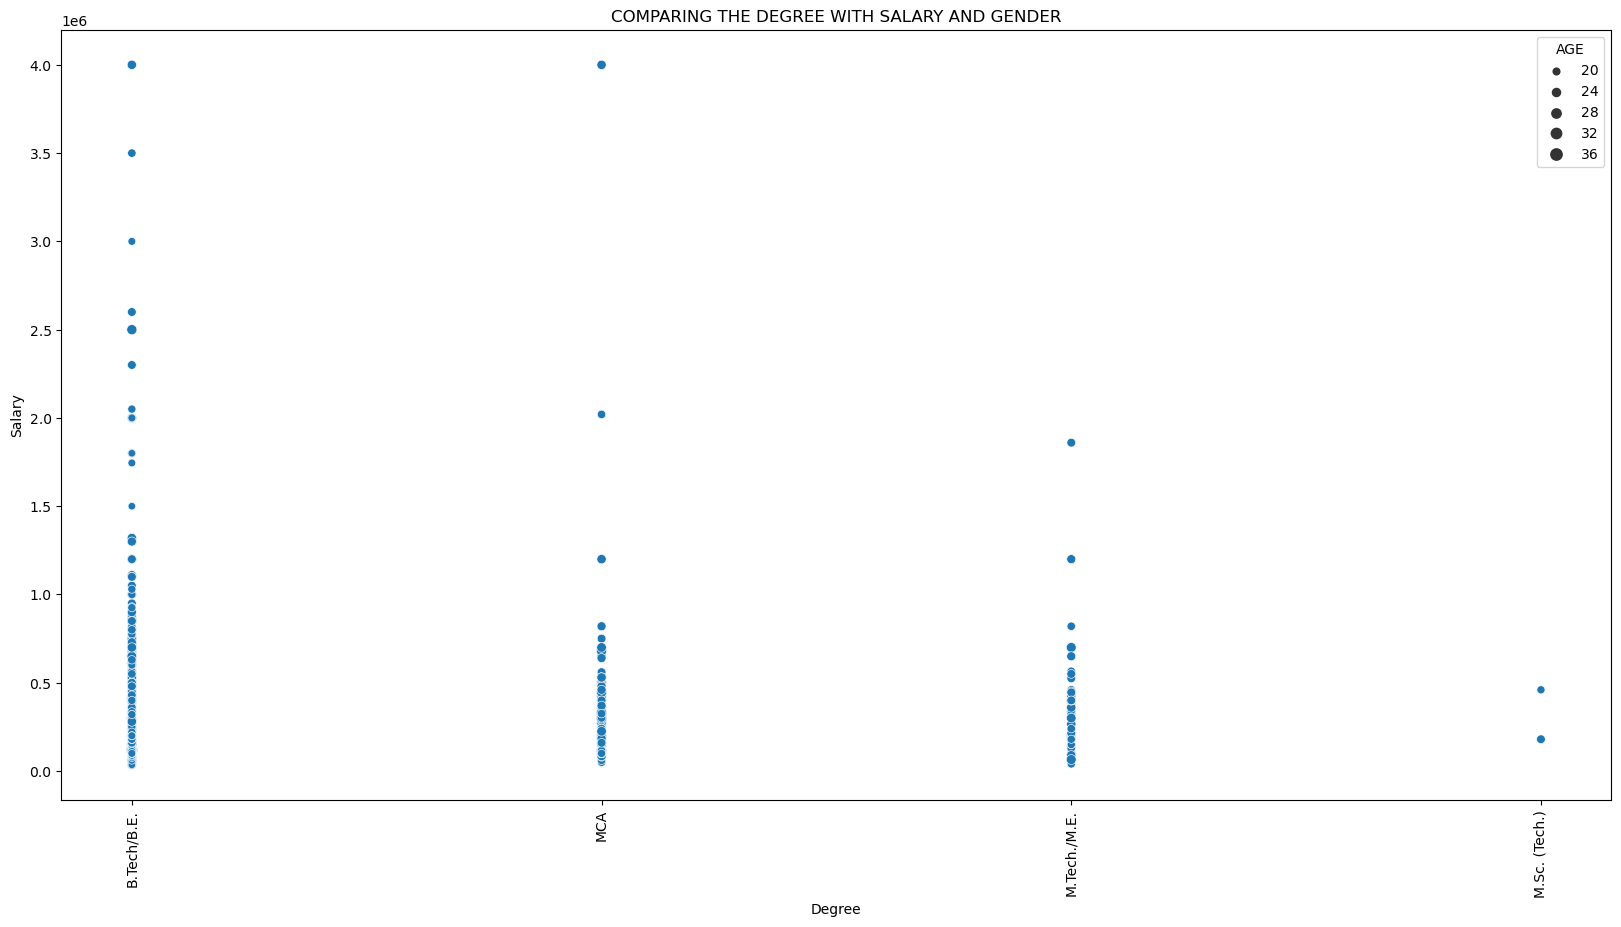

In [88]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Degree',y='Salary',data=df,size='AGE')
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE DEGREE WITH SALARY AND GENDER')
plt.show()

### PROBLEM STATEMENT

In [89]:
analyst= df[df.Designation=='business analyst']
analyst

Salary       Designation    JobCity Gender  10percentage  \
100   300000.0  business analyst  BANGALORE      m         75.00   
269   350000.0  business analyst  BANGALORE      f         85.00   
284   305000.0  business analyst         -1      m         79.83   
339   105000.0  business analyst     JAIPUR      f         71.80   
435   500000.0  business analyst    GURGAON      m         70.67   
492   525000.0  business analyst      NOIDA      m         92.00   
556   320000.0  business analyst  BANGALORE      m         86.00   
667   450000.0  business analyst         -1      f         83.20   
684   160000.0  business analyst      NOIDA      m         83.00   
739   210000.0  business analyst     JAIPUR      f         71.00   
858   105000.0  business analyst  HYDERABAD      m         79.20   
872   195000.0  business analyst         -1      m         76.20   
1026  300000.0  business analyst    GURGAON      f         72.00   
1074  305000.0  business analyst       PUNE      m         73.33   
1101  240000.0  business analyst      NOIDA      m         88.20   
1116  100000.0  business analyst     JAIPUR      f         79.00   
1118  380000.0  business analyst         -1      m         75.40   
1218  150000.0  business analyst     JAIPUR      m         73.00   
1278  360000.0  business analyst  BANGALORE      m         82.00   
1516  200000.0  business analyst      DELHI      f         80.60   
1534  420000.0  business analyst      NOIDA      f         81.20   
1586  125000.0  business analyst   DEHRADUN      m         58.00   
1621  500000.0  business analyst      NOIDA      m         67.60   
1732  390000.0  business analyst      NOIDA      m         82.00   
1769  325000.0  business analyst  BANGALORE      m         89.60   
1833  180000.0  business analyst  HYDERABAD      f         76.00   
1850  400000.0  business analyst  HYDERABAD      m         77.00   
1881  500000.0  business analyst    GURGAON      m         87.00   
2093  950000.0  business analyst      NOIDA      m         88.00   
2098  325000.0  business analyst      DELHI      f         84.60   
2257  600000.0  business analyst  HYDERABAD      m         69.80   
2326  300000.0  business analyst  BANGALORE      f         79.00   
2558  600000.0  business analyst  BANGALORE      f         95.60   
2571  330000.0  business analyst  BANGALORE      f         90.00   
2640  700000.0  business analyst  BANGALORE      m         91.00   
2835  325000.0  business analyst      NOIDA      f         87.00   
2923  300000.0  business analyst    GURGAON      m         67.00   
2988  500000.0  business analyst    GURGAON      m         95.20   
3092  200000.0  business analyst      DELHI      m         84.20   
3150  145000.0  business analyst  BANGALORE      f         71.00   
3177  340000.0  business analyst      NOIDA      m         69.66   
3198  180000.0  business analyst    GURGAON      m         72.00   
3243  300000.0  business analyst    GURGAON      m         81.50   
3331  420000.0  business analyst      NOIDA      f         81.50   
3365  360000.0  business analyst  HYDERABAD      m         83.30   
3369  360000.0  business analyst    GURGAON      f         85.80   
3556  100000.0  business analyst     JAIPUR      f         74.90   
3752  450000.0  business analyst  BANGALORE      m         92.20   
3886  300000.0  business analyst  HYDERABAD      f         76.00   

                           10board  12graduation  12percentage  \
100                    state board          2008         72.00   
269                           icse          2011         75.00   
284                    state board          2010         91.50   
339                           cbse          2009         64.80   
435                           rbse          2007         67.80   
492                           cbse          2010         82.40   
556                           cbse          2010         70.00   
667                           cbse          2009         80.40   
684          

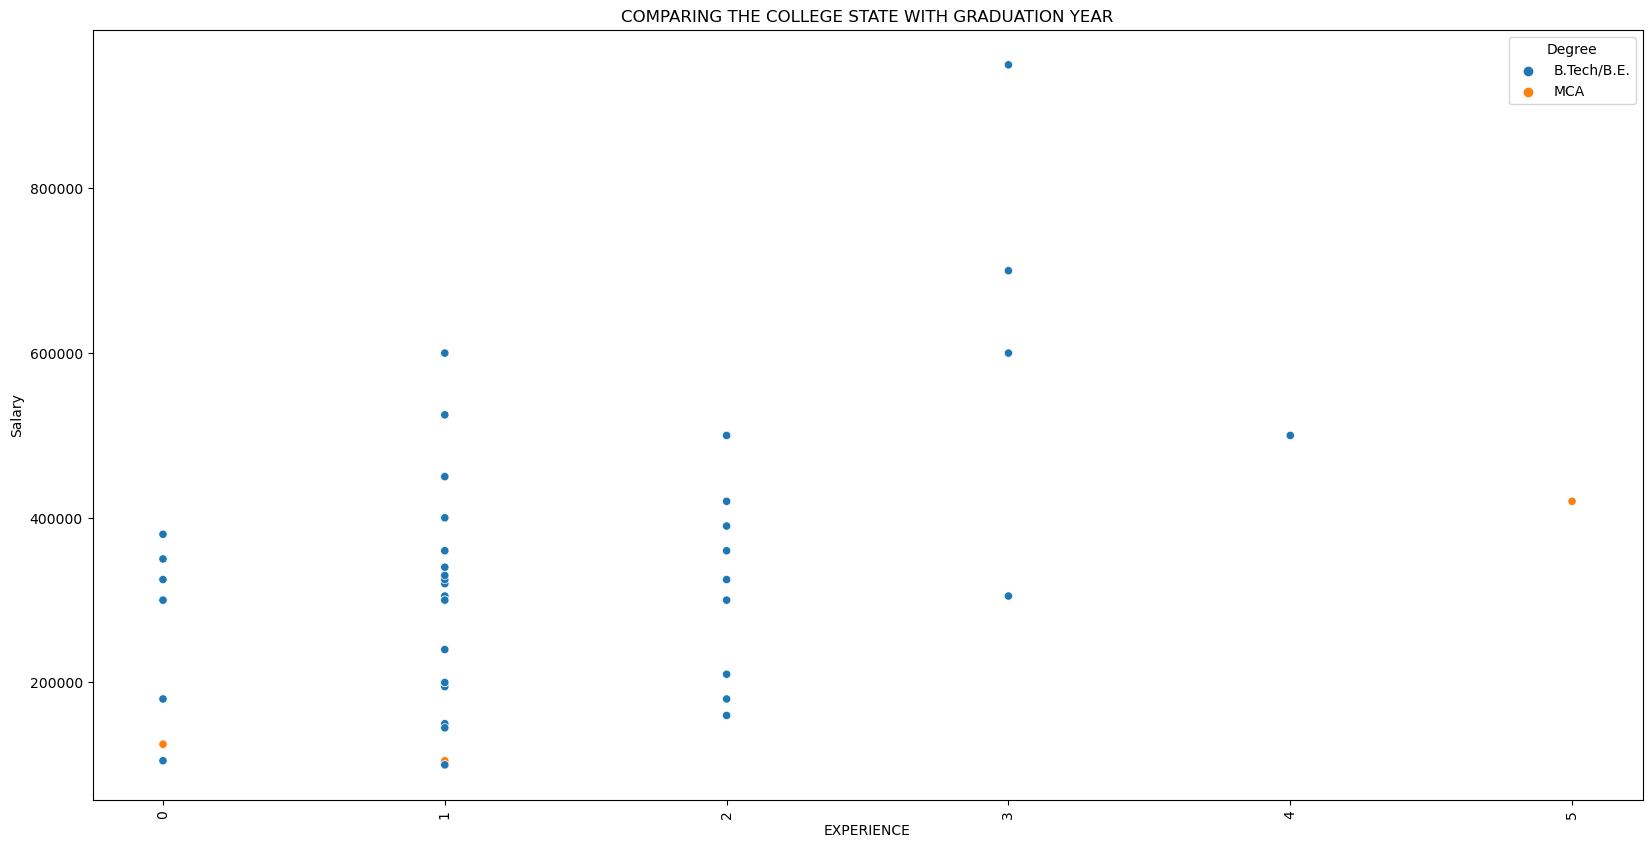

In [90]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='EXPERIENCE',y='Salary',data=analyst,hue='Degree')
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE COLLEGE STATE WITH GRADUATION YEAR')
plt.show()

In [91]:
job = df[(df['Designation'] == 'system engineer') & (df['Salary'] > 450000)]

In [92]:
job

Salary      Designation    JobCity Gender  10percentage  \
30    530000.0  system engineer  HYDERABAD      m         84.00   
66    455000.0  system engineer  BANGALORE      m         90.00   
171   455000.0  system engineer       PUNE      m         76.87   
363   500000.0  system engineer  BANGALORE      m         87.20   
504   460000.0  system engineer       PUNE      m         86.00   
510   715000.0  system engineer  AHMEDABAD      m         83.43   
541   495000.0  system engineer  BANGALORE      m         82.50   
582   460000.0  system engineer  BANGALORE      m         88.40   
630   500000.0  system engineer    KOLKATA      f         68.00   
742   490000.0  system engineer     MUMBAI      m         79.80   
871   465000.0  system engineer     MUMBAI      f         94.20   
895   480000.0  system engineer    KOLKATA      m         75.75   
1004  510000.0  system engineer  BANGALORE      f         97.12   
1287  500000.0  system engineer      NOIDA      m         62.00   
1331  470000.0  system engineer    KOLKATA      m         89.00   
1662  470000.0  system engineer  BANGALORE      m         80.67   
1813  495000.0  system engineer     MUMBAI      m         83.00   
1816  560000.0  system engineer  BANGALORE      m         92.80   
1890  470000.0  system engineer    KOLKATA      m         70.40   
2059  495000.0  system engineer         -1      m         85.40   
2228  725000.0  system engineer       PUNE      m         75.60   
2287  470000.0  system engineer    GURGAON      m         73.00   
2386  505000.0  system engineer       PUNE      m         88.60   
2429  460000.0  system engineer    GURGAON      m         87.00   
2595  470000.0  system engineer  HYDERABAD      m         88.00   
2621  570000.0  system engineer    CHENNAI      m         77.40   
2647  555000.0  system engineer    CHENNAI      m         84.67   
2662  470000.0  system engineer    KOLKATA      m         77.38   
2678  480000.0  system engineer     MUMBAI      m         91.00   
2704  480000.0  system engineer  BANGALORE      m         82.24   
2715  500000.0  system engineer  HYDERABAD      m         83.00   
2891  500000.0  system engineer    KOLKATA      m         81.70   
3179  500000.0  system engineer      DELHI      f         95.40   
3272  515000.0  system engineer  HYDERABAD      f         88.00   
3297  470000.0  system engineer    CHENNAI      m         90.00   
3392  500000.0  system engineer       PUNE      m         84.33   
3468  520000.0  system engineer      NOIDA      m         65.80   
3538  460000.0  system engineer     MUMBAI      m         77.60   
3563  460000.0  system engineer    GURGAON      m         73.00   
3592  470000.0  system engineer       PUNE      m         88.00   
3764  470000.0  system engineer      NOIDA      m         85.00   
3805  500000.0  system engineer  BANGALORE      m         76.20   
3833  500000.0  system engineer     MUMBAI      m         77.92   
3866  530000.0  system engineer    KOLKATA      m         78.00   
3933  490000.0  system engineer    CHENNAI      m         87.00   

                                                10board  12graduation  \
30                                                  ssc          2007   
66    state board of secondary education, andhra pra...          2006   
171                                            mp board          2008   
363                                         state board          2010   
504                    karnataka education board (keeb)          2008   
510                                               gsheb          2006   
541                                                rbse          2005   
582                                                   0          2008   
630                                                   0          2007   
742                                                cbse          2007   
871                                                cbse          2008   
895                                              

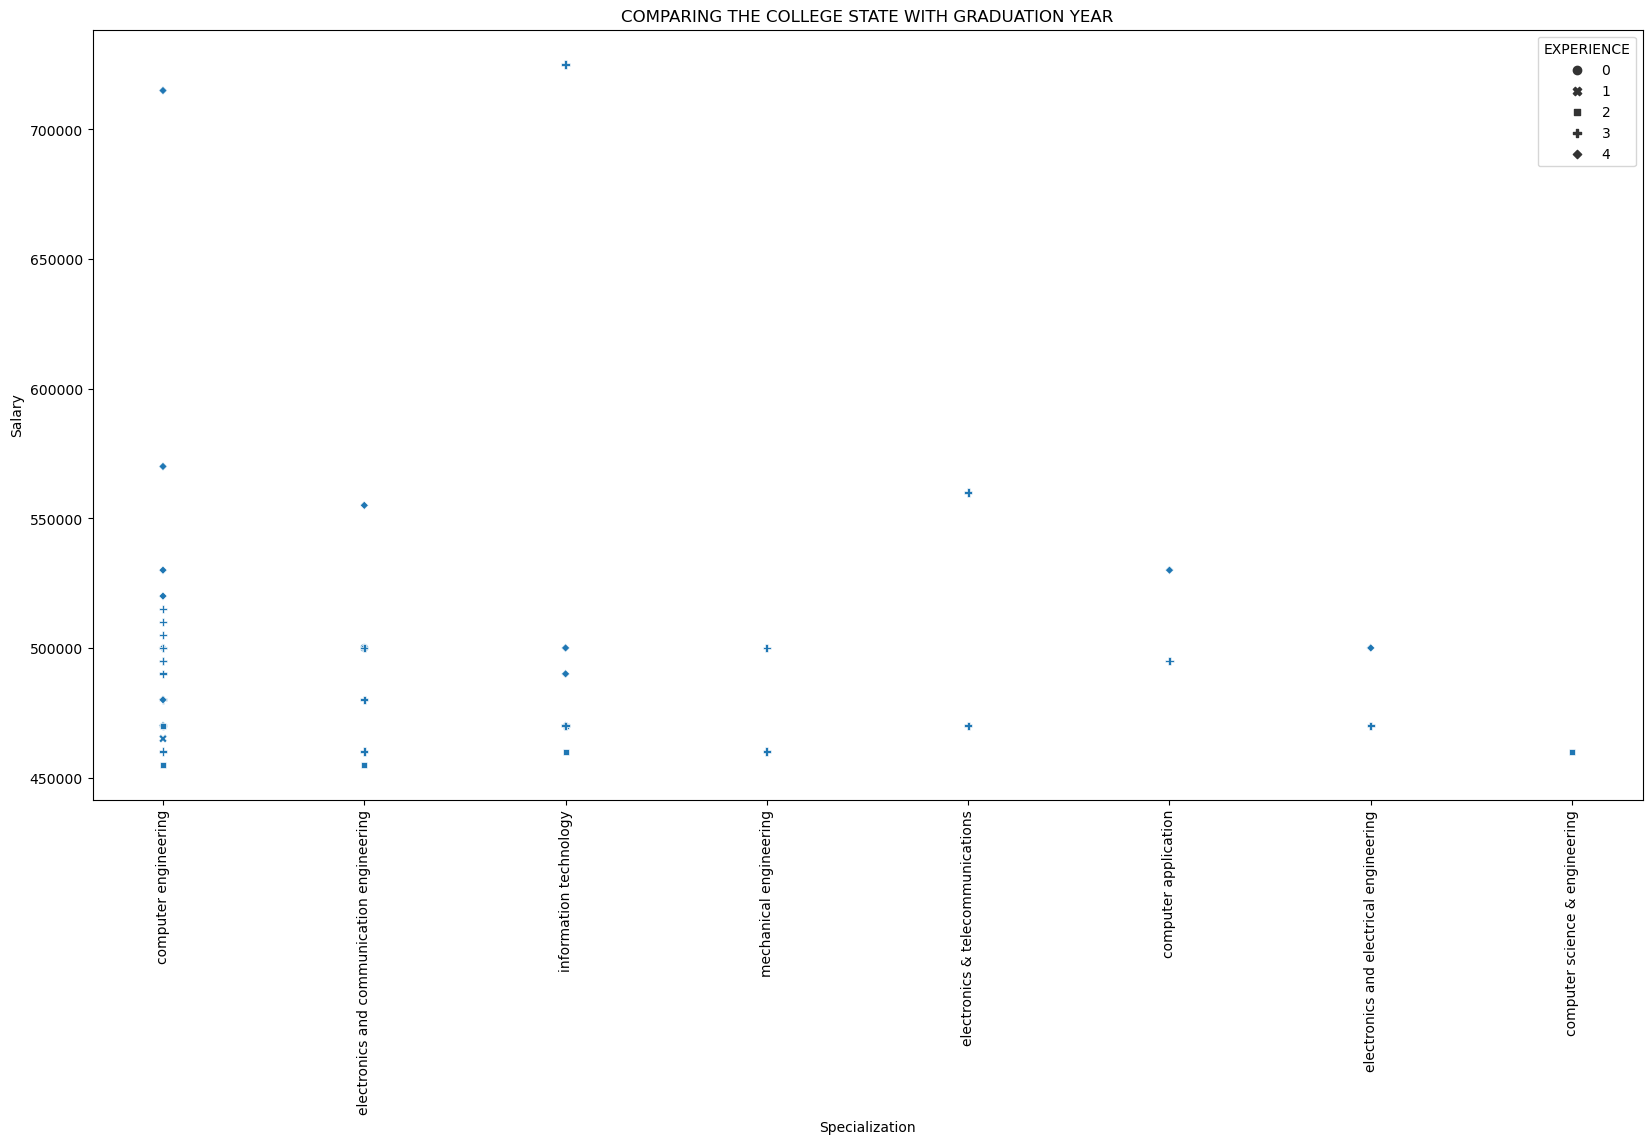

In [93]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Specialization',y='Salary',data=job,style='EXPERIENCE')
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE COLLEGE STATE WITH GRADUATION YEAR')
plt.show()

In [94]:
data = df[df.Designation=='data analyst']
data

Salary   Designation            JobCity Gender  10percentage  \
74    120000.0  data analyst             INDORE      f         86.00   
153   180000.0  data analyst          HYDERABAD      m         81.33   
302   105000.0  data analyst               PUNE      f         73.00   
402   215000.0  data analyst          HYDERABAD      m         70.83   
451   170000.0  data analyst          HYDERABAD      m         86.80   
493   720000.0  data analyst            GURGAON      m         87.80   
636   180000.0  data analyst            GURGAON      m         67.30   
643   180000.0  data analyst            GURGAON      m         60.00   
738   290000.0  data analyst  VISAKHAPATNABOARD      m         80.20   
875   200000.0  data analyst              NOIDA      f         66.80   
981   175000.0  data analyst          HYDERABAD      f         91.30   
1086  210000.0  data analyst          HYDERABAD      m         72.40   
1131  150000.0  data analyst              NOIDA      f         80.60   
1251  200000.0  data analyst            GURGAON      m         71.00   
1266  180000.0  data analyst              NOIDA      m         66.00   
1295  200000.0  data analyst          HYDERABAD      m         89.00   
1338  150000.0  data analyst            CHENNAI      m         83.40   
1350  300000.0  data analyst               PUNE      m         73.07   
1352  280000.0  data analyst              NOIDA      f         76.00   
1397  180000.0  data analyst            GURGAON      f         78.00   
1471  145000.0  data analyst          HYDERABAD      f         71.10   
1695  180000.0  data analyst            GURGAON      m         82.20   
1711  625000.0  data analyst                 -1      m         88.00   
1734  155000.0  data analyst             MYSORE      m         79.68   
1754  200000.0  data analyst            CHENNAI      f         70.60   
2024  200000.0  data analyst          HYDERABAD      f         51.36   
2056  145000.0  data analyst          BANGALORE      m         67.60   
2073  260000.0  data analyst          BANGALORE      m         84.43   
2144  220000.0  data analyst          BANGALORE      m         74.40   
2204  200000.0  data analyst          BANGALORE      m         81.40   
2231  300000.0  data analyst          BANGALORE      m         70.00   
2272  420000.0  data analyst                 -1      m         75.00   
2364  265000.0  data analyst            GURGAON      m         82.00   
2422  130000.0  data analyst                 -1      m         58.00   
2471  325000.0  data analyst               PUNE      f         78.00   
2569  220000.0  data analyst         COIMBATORE      m         68.67   
2737  310000.0  data analyst          HYDERABAD      f         82.30   
2832  180000.0  data analyst              NOIDA      m         63.00   
2845  170000.0  data analyst          HYDERABAD      f         83.50   
2970  180000.0  data analyst                 -1      m         76.00   
2989  120000.0  data analyst          HYDERABAD      m         68.33   
3050  260000.0  data analyst            GURGAON      m         77.60   
3187  345000.0  data analyst            CHENNAI      m         56.00   
3535  320000.0  data analyst                 -1      f         80.16   
3540  180000.0  data analyst                 -1      f         81.60   
3633  280000.0  data analyst                 -1      m         78.00   
3885  180000.0  data analyst          HYDERABAD      m         83.33   
3921  300000.0  data analyst          BANGALORE      m         62.00   
3988  200000.0  data analyst          BANGALORE      f         74.40   

                                  10board  12graduation  12percentage  \
74                            state board          2009         77.00   
153                                   ssc          2006         91.90   
302                              ms board          2007         66.00   
402                                   ssc          2007         71.00   
451                           state board 

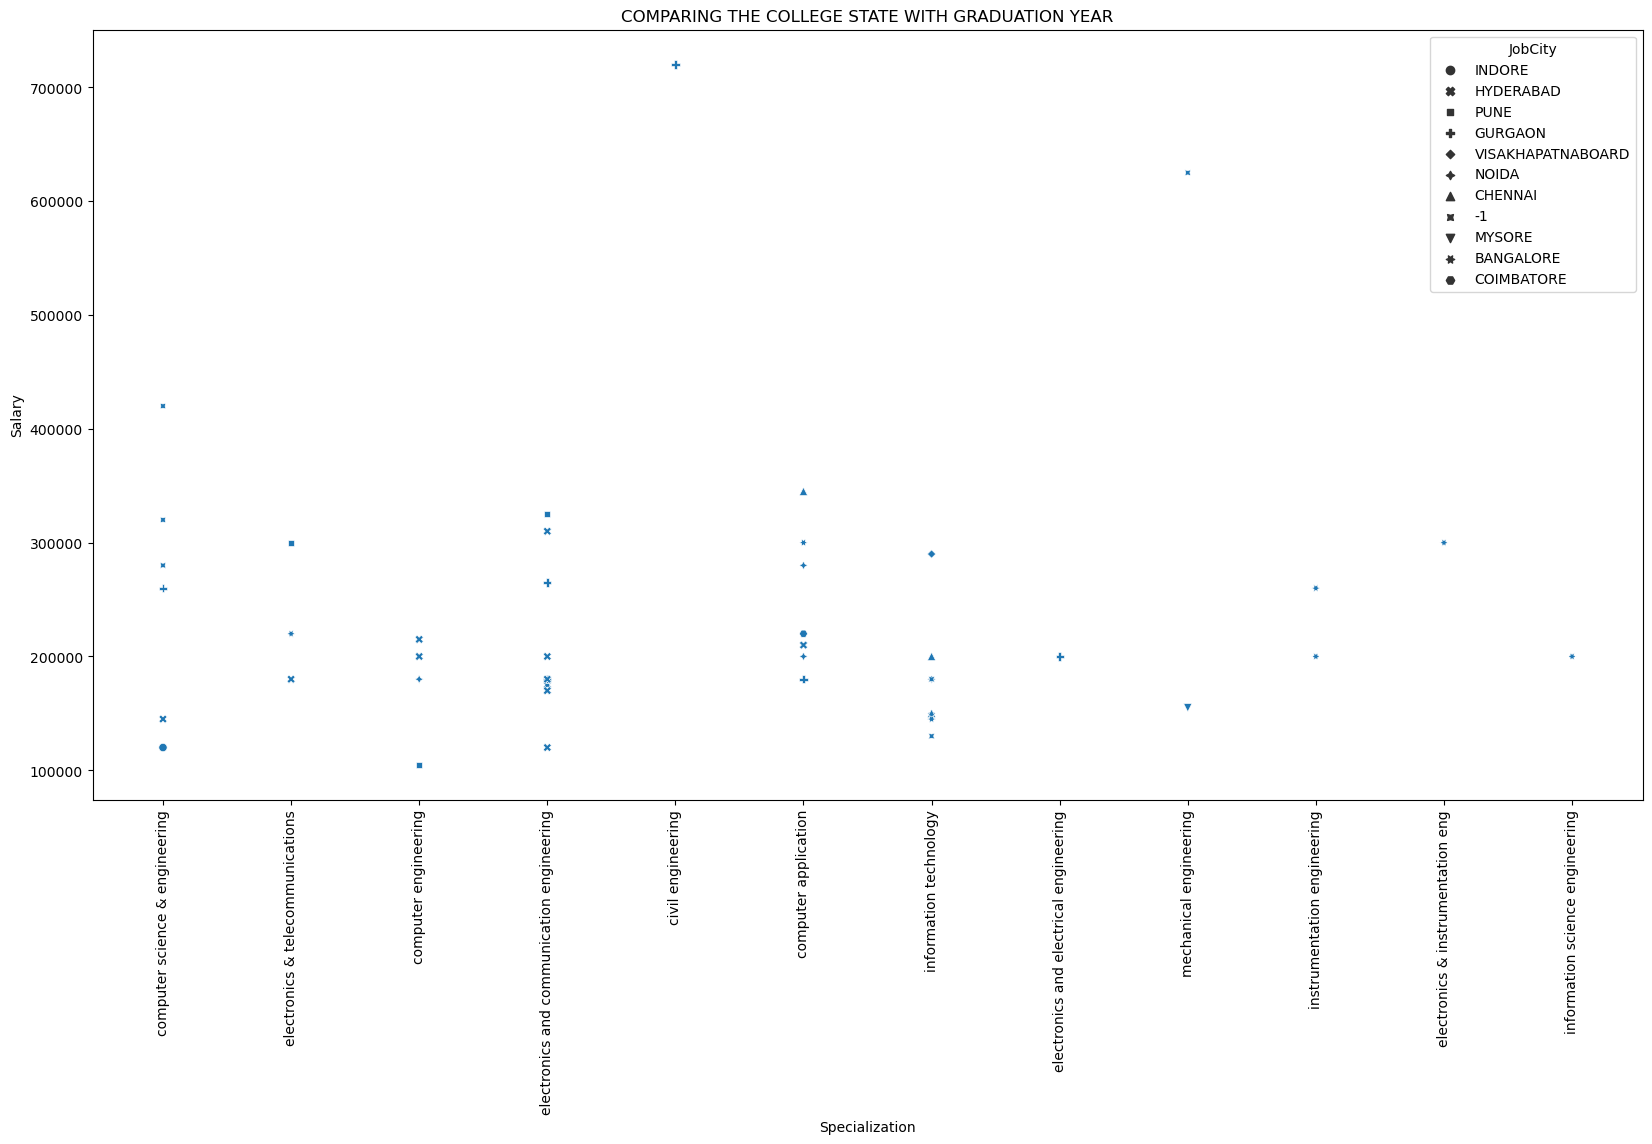

In [95]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Specialization',y='Salary',data=data,style='JobCity')
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE COLLEGE STATE WITH GRADUATION YEAR')
plt.show()

In [96]:
exp = df[(df['EXPERIENCE'] == 0) & (df['Salary'] > 300000)]

In [97]:
exp

Salary                    Designation      JobCity Gender  \
52     400000.0              software engineer  NAVI MUMBAI      m   
65     310000.0                system engineer       MYSORE      m   
85     315000.0              firmware engineer        NOIDA      m   
92    1500000.0          application developer    HYDERABAD      m   
105    320000.0      assistant system engineer           -1      m   
...         ...                            ...          ...    ...   
3802   320000.0  business intelligence analyst   TRIVANDRUM      m   
3815   320000.0         java software engineer    BANGALORE      m   
3930   315000.0    associate software engineer        DELHI      m   
3969   330000.0             technical engineer         PUNE      m   
3983   315000.0           system administrator    HYDERABAD      m   

      10percentage      10board  12graduation  12percentage      12board  \
52           85.20         icse          2010         81.50         icse   
65           89.37  state board          2009         79.00  state board   
85           86.16         cbse          2011         70.08         cbse   
92           79.00  state board          2009         87.90  state board   
105          86.00  state board          2010         92.00  state board   
...            ...          ...           ...           ...          ...   
3802         67.25  state board          2010         71.80  state board   
3815         72.60         cbse          2008         71.40         cbse   
3930         83.60         cbse          2010         73.40         cbse   
3969         76.00  state board          2009         89.80  state board   
3983         88.10  state board          2009         91.10  state board   

      CollegeID  ...  English Logical Quant  conscientiousness agreeableness  \
52         8350  ...      545     385   485             1.1336        0.3789   
65         2085  ...      630     580   510             0.9900        1.2114   
85         7376  ...      455     595   500             0.9900        1.0449   
92         9557  ...      315     435   355             0.4155        0.5454   
105        1947  ...      350     590   570             0.8463        0.0459   
...         ...  ...      ...     ...   ...                ...           ...   
3802      15146  ...      465     555   494             1.1336       -0.1206   
3815       7557  ...      685     595   690            -2.7443       -0.2871   
3930      14069  ...      525     420   500             1.4208        1.7109   
3969        272  ...      595     530   630             0.5591        0.7119   
3983      15854  ...      535     435   500            -0.1590        0.8784   

      extraversion  nueroticism  openess_to_experience  EXPERIENCE  AGE  
52          1.0859       0.6530                 0.2889           0   23  
65         -0.2974      -1.1218                 1.2470           0   25  
85          1.7007      -2.0092                 0.2889           0   22  
92          0.9322      -0.6147                 0.8637           0   23  
105        -0.2974      -0.7415                -0.4776           0   22  
...            ...          ...                    ...         ...  ...  
3802       -1.0659      -0.1076                 0.2889           0   23  
3815       -0.2974       1.2869                -2.2021           0   24  
3930        1.7007      -2.2627                -1.4356           0   23  
3969        0.0100      -0.2344                 0.8637           0   22  
3983        0.4711       0.2727                 0.6721           0   24  

[114 rows x 26 columns]

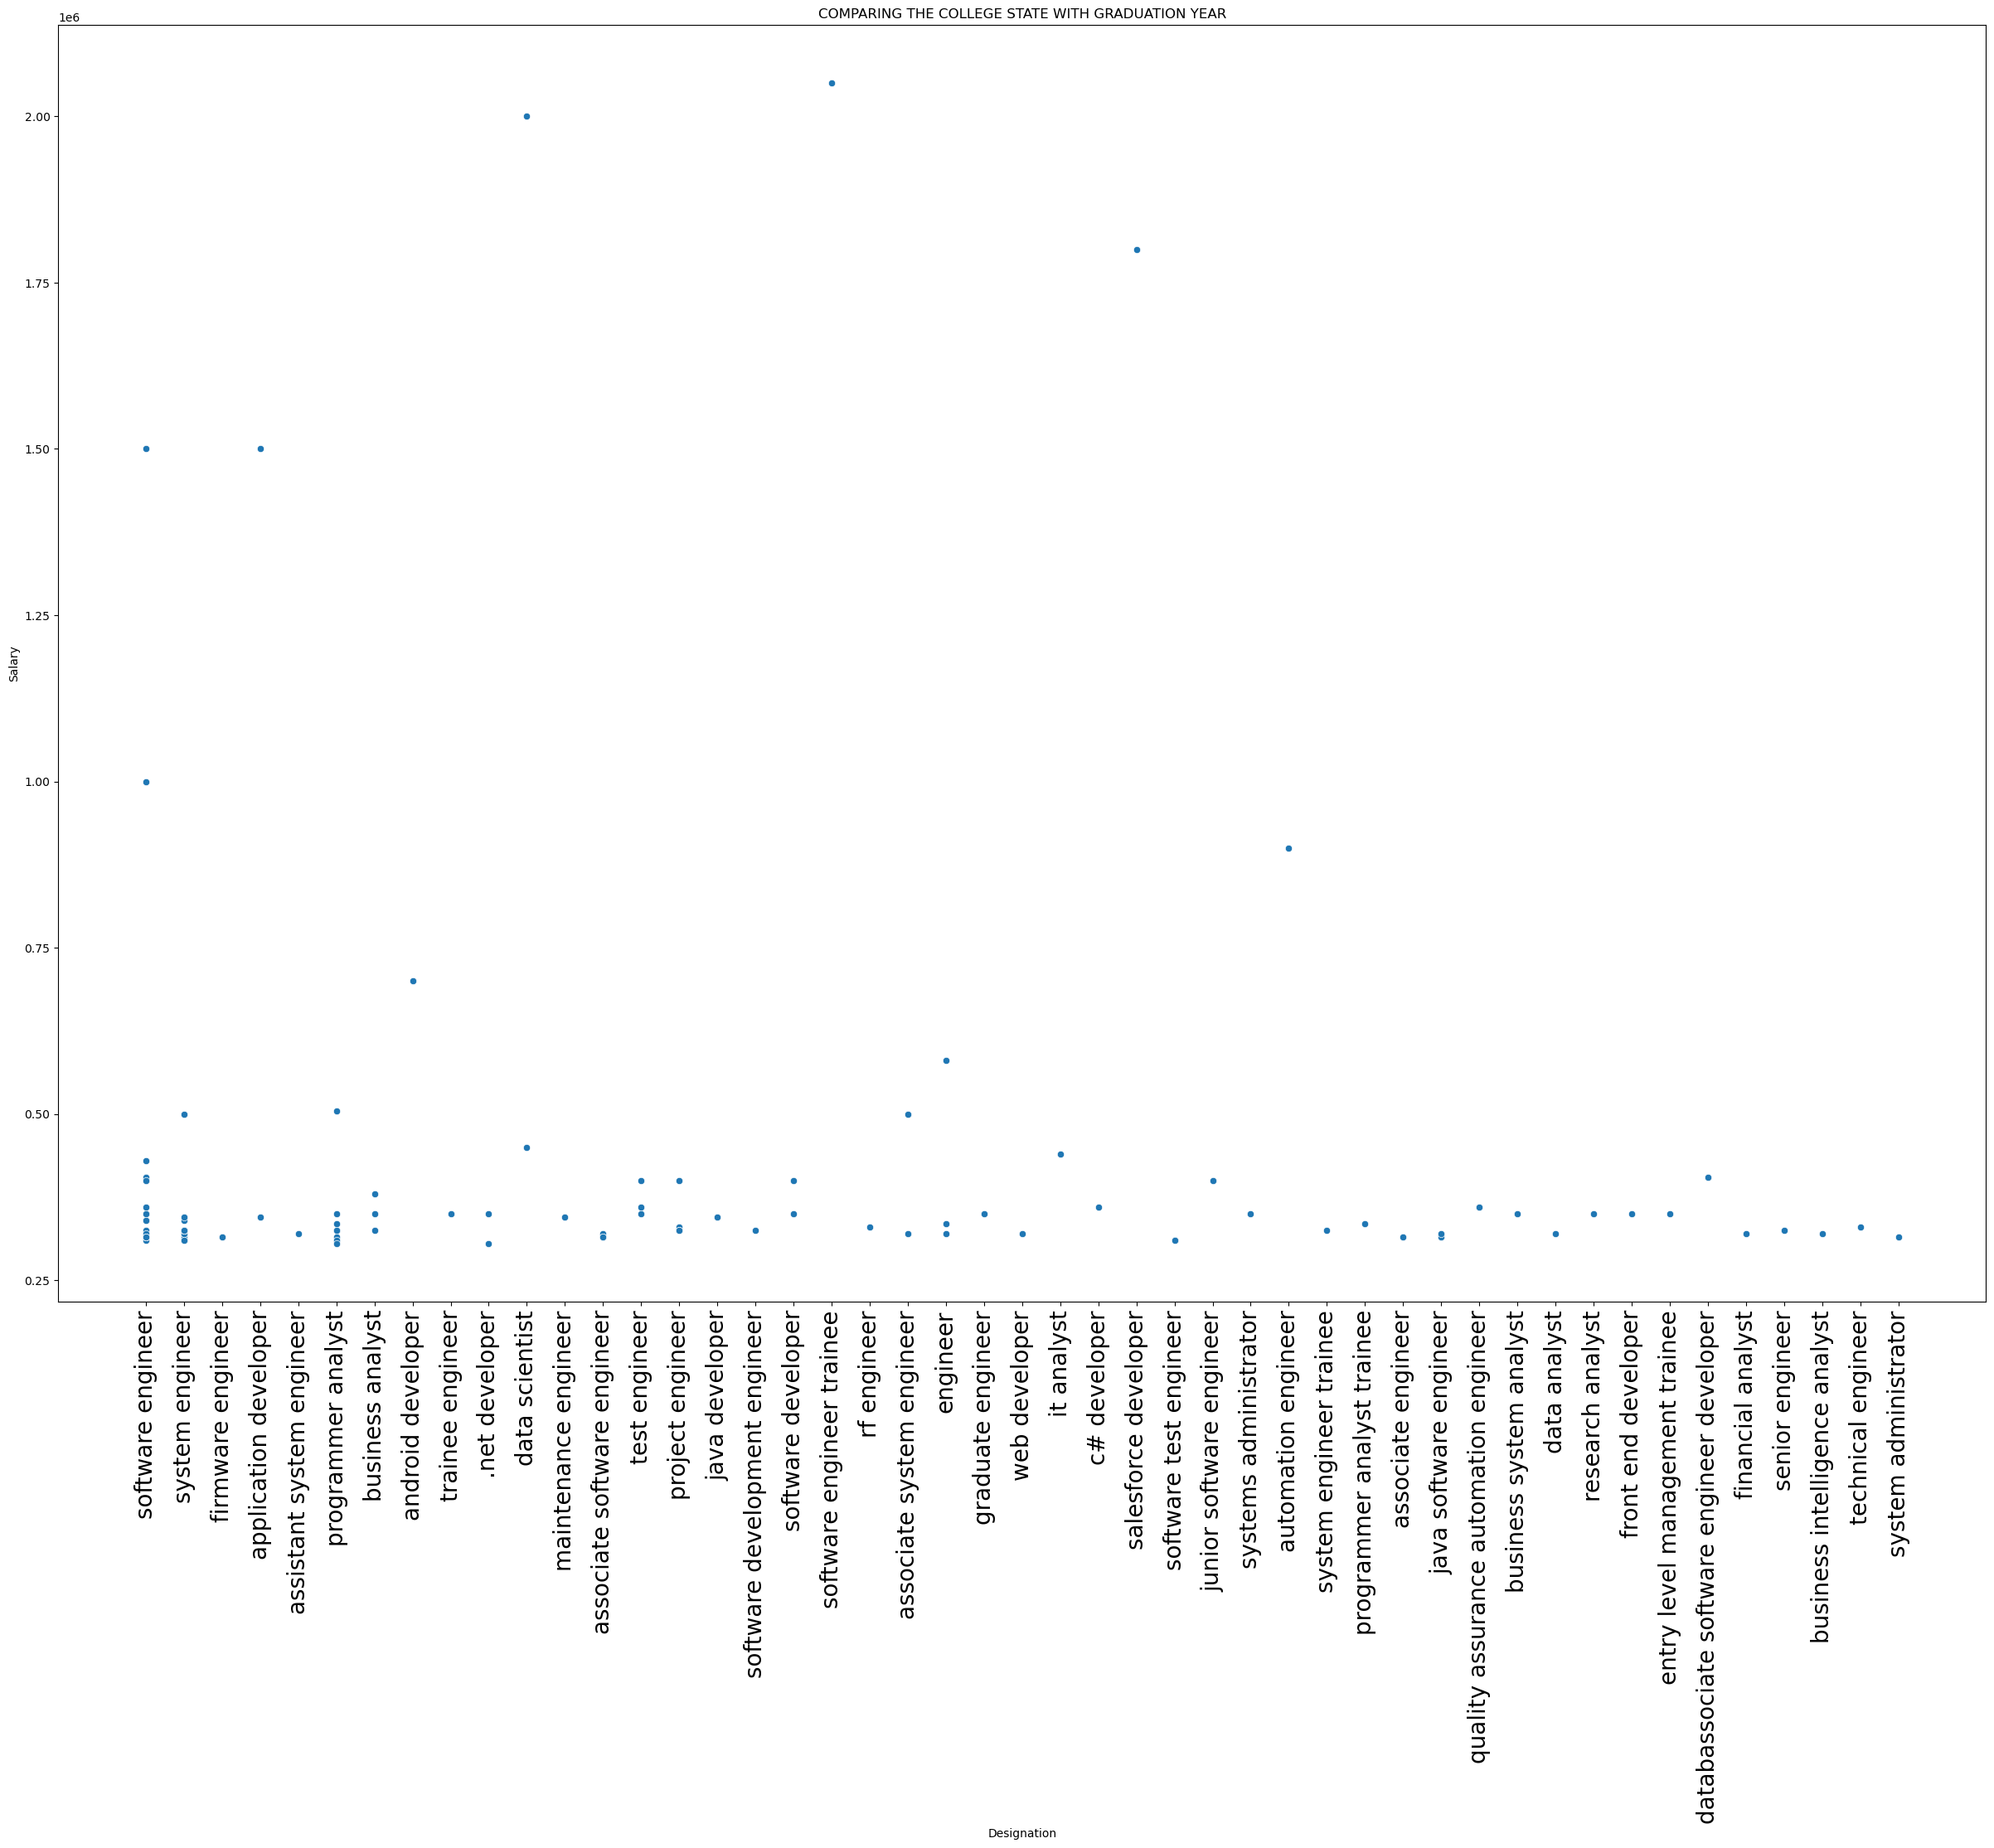

In [98]:
plt.figure(figsize=(30,20))
sns.scatterplot(x='Designation',y='Salary',data=exp)
plt.xticks(rotation=90,fontsize=20)
plt.title('COMPARING THE COLLEGE STATE WITH GRADUATION YEAR')
plt.show()

In [99]:
df

Salary                  Designation    JobCity Gender  10percentage  \
0      420000.0      senior quality engineer  BANGALORE      f         84.30   
1      500000.0            assistant manager     INDORE      m         85.40   
2      325000.0              system engineer    CHENNAI      f         85.00   
3     1100000.0     senior software engineer    GURGAON      m         85.60   
5      300000.0              system engineer  HYDERABAD      m         89.92   
...         ...                          ...        ...    ...           ...   
3993   280000.0            software engineer      DELHI      m         52.09   
3994   100000.0             technical writer  HYDERABAD      f         90.00   
3995   320000.0  associate software engineer  BANGALORE      m         81.86   
3996   200000.0           software developer  BANGALORE      f         78.72   
3997   400000.0       senior system engineer    CHENNAI      f         70.60   

                             10board  12graduation  12percentage  \
0     board ofsecondary education,ap          2007         95.80   
1                               cbse          2007         85.00   
2                               cbse          2010         68.20   
3                               cbse          2007         83.60   
5                        state board          2010         87.00   
...                              ...           ...           ...   
3993                            cbse          2006         55.50   
3994                     state board          2009         93.00   
3995                      bse,odisha          2008         65.50   
3996                     state board          2010         69.88   
3997                            cbse          2008         68.00   

                                 12board  CollegeID  ...  English Logical  \
0     board of intermediate education,ap       1141  ...      515     585   
1                                   cbse       5807  ...      695     610   
2                                   cbse         64  ...      615     545   
3                                   cbse       6920  ...      635     585   
5                            state board       5086  ...      560     555   
...                                  ...        ...  ...      ...     ...   
3993                                cbse       6268  ...      365     334   
3994                         state board       4883  ...      415     410   
3995                         chse,odisha       9786  ...      475     475   
3996                         state board        979  ...      450     410   
3997                                cbse       6609  ...      565     515   

     Quant  conscientiousness agreeableness  extraversion  nueroticism  \
0      525             0.9737        0.8128        0.5269      1.35490   
1      780            -0.7335        0.3789        1.2396     -0.10760   
2      370             0.2718        1.7109        0.1637     -0.86820   
3      625             0.0464        0.3448       -0.3440     -0.40780   
5      620            -0.3027       -0.6201       -2.2954     -0.74150   
...    ...                ...           ...           ...          ...   
3993   475            -0.1082        0.3448        0.2366      0.64980   
3994   535            -0.3027        0.8784        0.9322      0.77980   
3995   465            -1.5765       -1.5273       -1.5051     -1.31840   
3996   320            -0.1590        0.0459       -0.4511     -0.36120   
3997   464            -1.1128       -0.2793       -0.6343      1.32553   

      openess_to_experience  EXPERIENCE  AGE  
0                   -0.4455           3   25  
1                    0.8637           2   26  
2                    0.6721           1   23  
3                   -0.9194           4   26  
5                   -0.8608           1   23  
...                     ...         ...  ...  
3993                -0.9194           1   28  
3994                -0.0943           0  